In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For ex{"metadata":{"kernelspec":{"language":"python","display_name":"Python 3","name":"python3"},"language_info":{"name":"python","version":"3.10.14","mimetype":"text/x-python","codemirror_mode":{"name":"ipython","version":3},"pygments_lexer":"ipython3","nbconvert_exporter":"python","file_extension":".py"},"kaggle":{"accelerator":"none","dataSources":[{"sourceId":9741366,"sourceType":"datasetVersion","datasetId":5962750}],"dockerImageVersionId":30786,"isInternetEnabled":true,"language":"python","sourceType":"notebook","isGpuEnabled":false}},"nbformat_minor":4,"nbformat":4,"cells":[{"cell_type":"code","source":"# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here's several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only \"../input/\" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using \"Save & Run All\" \n# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session","metadata":{"_uuid":"8f2839f25d086af736a60e9eeb907d3b93b6e0e5","_cell_guid":"b1076dfc-b9ad-4769-8c92-a6c4dae69d19","execution":{"iopub.status.busy":"2024-10-30T12:52:46.007364Z","iopub.execute_input":"2024-10-30T12:52:46.007870Z","iopub.status.idle":"2024-10-30T12:52:47.392065Z","shell.execute_reply.started":"2024-10-30T12:52:46.007774Z","shell.execute_reply":"2024-10-30T12:52:47.390370Z"},"trusted":true},"execution_count":1,"outputs":[{"name":"stdout","text":"/kaggle/input/song-popularity/dataset.csv\n","output_type":"stream"}]},{"cell_type":"code","source":"import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.metrics import mean_absolute_error, mean_squared_error\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.inspection import permutation_importance","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:54:05.813831Z","iopub.execute_input":"2024-10-30T12:54:05.814992Z","iopub.status.idle":"2024-10-30T12:54:07.177314Z","shell.execute_reply.started":"2024-10-30T12:54:05.814939Z","shell.execute_reply":"2024-10-30T12:54:07.175841Z"},"trusted":true},"execution_count":2,"outputs":[]},{"cell_type":"code","source":"data = pd.read_csv('/kaggle/input/song-popularity/dataset.csv')","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:54:12.484986Z","iopub.execute_input":"2024-10-30T12:54:12.485603Z","iopub.status.idle":"2024-10-30T12:54:13.363584Z","shell.execute_reply.started":"2024-10-30T12:54:12.485552Z","shell.execute_reply":"2024-10-30T12:54:13.362332Z"},"trusted":true},"execution_count":3,"outputs":[]},{"cell_type":"code","source":"data","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:54:16.265011Z","iopub.execute_input":"2024-10-30T12:54:16.266471Z","iopub.status.idle":"2024-10-30T12:54:16.368348Z","shell.execute_reply.started":"2024-10-30T12:54:16.266415Z","shell.execute_reply":"2024-10-30T12:54:16.367040Z"},"trusted":true},"execution_count":4,"outputs":[{"execution_count":4,"output_type":"execute_result","data":{"text/plain":"        Unnamed: 0                track_id                 artists  \\\n0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   \n1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   \n2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   \n3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   \n4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   \n...            ...                     ...                     ...   \n113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   \n113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   \n113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   \n113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   \n113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   \n\n                                               album_name  \\\n0                                                  Comedy   \n1                                        Ghost (Acoustic)   \n2                                          To Begin Again   \n3       Crazy Rich Asians (Original Motion Picture Sou...   \n4                                                 Hold On   \n...                                                   ...   \n113995  #mindfulness - Soft Rain for Mindful Meditatio...   \n113996  #mindfulness - Soft Rain for Mindful Meditatio...   \n113997                                            Best Of   \n113998                                  Change Your World   \n113999                                     Miss Perfumado   \n\n                        track_name  popularity  duration_ms  explicit  \\\n0                           Comedy          73       230666     False   \n1                 Ghost - Acoustic          55       149610     False   \n2                   To Begin Again          57       210826     False   \n3       Can't Help Falling In Love          71       201933     False   \n4                          Hold On          82       198853     False   \n...                            ...         ...          ...       ...   \n113995         Sleep My Little Boy          21       384999     False   \n113996            Water Into Light          22       385000     False   \n113997              Miss Perfumado          22       271466     False   \n113998                     Friends          41       283893     False   \n113999                   Barbincor          22       241826     False   \n\n        danceability  energy  ...  loudness  mode  speechiness  acousticness  \\\n0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   \n1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   \n2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   \n3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   \n4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   \n...              ...     ...  ...       ...   ...          ...           ...   \n113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   \n113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   \n113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   \n113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   \n113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   \n\n        instrumentalness  liveness  valence    tempo  time_signature  \\\n0               0.000001    0.3580   0.7150   87.917               4   \n1               0.000006    0.1010   0.2670   77.489               4   \n2               0.000000    0.1170   0.1200   76.332               4   \n3               0.000071    0.1320   0.1430  181.740               3   \n4               0.000000    0.0829   0.1670  119.949               4   \n...                  ...       ...      ...      ...             ...   \n113995          0.928000    0.0863   0.0339  125.995               5   \n113996          0.976000    0.1050   0.0350   85.239               4   \n113997          0.000000    0.0839   0.7430  132.378               4   \n113998          0.000000    0.2700   0.4130  135.960               4   \n113999          0.000000    0.0893   0.7080   79.198               4   \n\n        track_genre  \n0          acoustic  \n1          acoustic  \n2          acoustic  \n3          acoustic  \n4          acoustic  \n...             ...  \n113995  world-music  \n113996  world-music  \n113997  world-music  \n113998  world-music  \n113999  world-music  \n\n[114000 rows x 21 columns]","text/html":"<div>\n<style scoped>\n    .dataframe tbody tr th:only-of-type {\n        vertical-align: middle;\n    }\n\n    .dataframe tbody tr th {\n        vertical-align: top;\n    }\n\n    .dataframe thead th {\n        text-align: right;\n    }\n</style>\n<table border=\"1\" class=\"dataframe\">\n  <thead>\n    <tr style=\"text-align: right;\">\n      <th></th>\n      <th>Unnamed: 0</th>\n      <th>track_id</th>\n      <th>artists</th>\n      <th>album_name</th>\n      <th>track_name</th>\n      <th>popularity</th>\n      <th>duration_ms</th>\n      <th>explicit</th>\n      <th>danceability</th>\n      <th>energy</th>\n      <th>...</th>\n      <th>loudness</th>\n      <th>mode</th>\n      <th>speechiness</th>\n      <th>acousticness</th>\n      <th>instrumentalness</th>\n      <th>liveness</th>\n      <th>valence</th>\n      <th>tempo</th>\n      <th>time_signature</th>\n      <th>track_genre</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>0</td>\n      <td>5SuOikwiRyPMVoIQDJUgSV</td>\n      <td>Gen Hoshino</td>\n      <td>Comedy</td>\n      <td>Comedy</td>\n      <td>73</td>\n      <td>230666</td>\n      <td>False</td>\n      <td>0.676</td>\n      <td>0.4610</td>\n      <td>...</td>\n      <td>-6.746</td>\n      <td>0</td>\n      <td>0.1430</td>\n      <td>0.0322</td>\n      <td>0.000001</td>\n      <td>0.3580</td>\n      <td>0.7150</td>\n      <td>87.917</td>\n      <td>4</td>\n      <td>acoustic</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>1</td>\n      <td>4qPNDBW1i3p13qLCt0Ki3A</td>\n      <td>Ben Woodward</td>\n      <td>Ghost (Acoustic)</td>\n      <td>Ghost - Acoustic</td>\n      <td>55</td>\n      <td>149610</td>\n      <td>False</td>\n      <td>0.420</td>\n      <td>0.1660</td>\n      <td>...</td>\n      <td>-17.235</td>\n      <td>1</td>\n      <td>0.0763</td>\n      <td>0.9240</td>\n      <td>0.000006</td>\n      <td>0.1010</td>\n      <td>0.2670</td>\n      <td>77.489</td>\n      <td>4</td>\n      <td>acoustic</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2</td>\n      <td>1iJBSr7s7jYXzM8EGcbK5b</td>\n      <td>Ingrid Michaelson;ZAYN</td>\n      <td>To Begin Again</td>\n      <td>To Begin Again</td>\n      <td>57</td>\n      <td>210826</td>\n      <td>False</td>\n      <td>0.438</td>\n      <td>0.3590</td>\n      <td>...</td>\n      <td>-9.734</td>\n      <td>1</td>\n      <td>0.0557</td>\n      <td>0.2100</td>\n      <td>0.000000</td>\n      <td>0.1170</td>\n      <td>0.1200</td>\n      <td>76.332</td>\n      <td>4</td>\n      <td>acoustic</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>3</td>\n      <td>6lfxq3CG4xtTiEg7opyCyx</td>\n      <td>Kina Grannis</td>\n      <td>Crazy Rich Asians (Original Motion Picture Sou...</td>\n      <td>Can't Help Falling In Love</td>\n      <td>71</td>\n      <td>201933</td>\n      <td>False</td>\n      <td>0.266</td>\n      <td>0.0596</td>\n      <td>...</td>\n      <td>-18.515</td>\n      <td>1</td>\n      <td>0.0363</td>\n      <td>0.9050</td>\n      <td>0.000071</td>\n      <td>0.1320</td>\n      <td>0.1430</td>\n      <td>181.740</td>\n      <td>3</td>\n      <td>acoustic</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>4</td>\n      <td>5vjLSffimiIP26QG5WcN2K</td>\n      <td>Chord Overstreet</td>\n      <td>Hold On</td>\n      <td>Hold On</td>\n      <td>82</td>\n      <td>198853</td>\n      <td>False</td>\n      <td>0.618</td>\n      <td>0.4430</td>\n      <td>...</td>\n      <td>-9.681</td>\n      <td>1</td>\n      <td>0.0526</td>\n      <td>0.4690</td>\n      <td>0.000000</td>\n      <td>0.0829</td>\n      <td>0.1670</td>\n      <td>119.949</td>\n      <td>4</td>\n      <td>acoustic</td>\n    </tr>\n    <tr>\n      <th>...</th>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n    </tr>\n    <tr>\n      <th>113995</th>\n      <td>113995</td>\n      <td>2C3TZjDRiAzdyViavDJ217</td>\n      <td>Rainy Lullaby</td>\n      <td>#mindfulness - Soft Rain for Mindful Meditatio...</td>\n      <td>Sleep My Little Boy</td>\n      <td>21</td>\n      <td>384999</td>\n      <td>False</td>\n      <td>0.172</td>\n      <td>0.2350</td>\n      <td>...</td>\n      <td>-16.393</td>\n      <td>1</td>\n      <td>0.0422</td>\n      <td>0.6400</td>\n      <td>0.928000</td>\n      <td>0.0863</td>\n      <td>0.0339</td>\n      <td>125.995</td>\n      <td>5</td>\n      <td>world-music</td>\n    </tr>\n    <tr>\n      <th>113996</th>\n      <td>113996</td>\n      <td>1hIz5L4IB9hN3WRYPOCGPw</td>\n      <td>Rainy Lullaby</td>\n      <td>#mindfulness - Soft Rain for Mindful Meditatio...</td>\n      <td>Water Into Light</td>\n      <td>22</td>\n      <td>385000</td>\n      <td>False</td>\n      <td>0.174</td>\n      <td>0.1170</td>\n      <td>...</td>\n      <td>-18.318</td>\n      <td>0</td>\n      <td>0.0401</td>\n      <td>0.9940</td>\n      <td>0.976000</td>\n      <td>0.1050</td>\n      <td>0.0350</td>\n      <td>85.239</td>\n      <td>4</td>\n      <td>world-music</td>\n    </tr>\n    <tr>\n      <th>113997</th>\n      <td>113997</td>\n      <td>6x8ZfSoqDjuNa5SVP5QjvX</td>\n      <td>Cesária Evora</td>\n      <td>Best Of</td>\n      <td>Miss Perfumado</td>\n      <td>22</td>\n      <td>271466</td>\n      <td>False</td>\n      <td>0.629</td>\n      <td>0.3290</td>\n      <td>...</td>\n      <td>-10.895</td>\n      <td>0</td>\n      <td>0.0420</td>\n      <td>0.8670</td>\n      <td>0.000000</td>\n      <td>0.0839</td>\n      <td>0.7430</td>\n      <td>132.378</td>\n      <td>4</td>\n      <td>world-music</td>\n    </tr>\n    <tr>\n      <th>113998</th>\n      <td>113998</td>\n      <td>2e6sXL2bYv4bSz6VTdnfLs</td>\n      <td>Michael W. Smith</td>\n      <td>Change Your World</td>\n      <td>Friends</td>\n      <td>41</td>\n      <td>283893</td>\n      <td>False</td>\n      <td>0.587</td>\n      <td>0.5060</td>\n      <td>...</td>\n      <td>-10.889</td>\n      <td>1</td>\n      <td>0.0297</td>\n      <td>0.3810</td>\n      <td>0.000000</td>\n      <td>0.2700</td>\n      <td>0.4130</td>\n      <td>135.960</td>\n      <td>4</td>\n      <td>world-music</td>\n    </tr>\n    <tr>\n      <th>113999</th>\n      <td>113999</td>\n      <td>2hETkH7cOfqmz3LqZDHZf5</td>\n      <td>Cesária Evora</td>\n      <td>Miss Perfumado</td>\n      <td>Barbincor</td>\n      <td>22</td>\n      <td>241826</td>\n      <td>False</td>\n      <td>0.526</td>\n      <td>0.4870</td>\n      <td>...</td>\n      <td>-10.204</td>\n      <td>0</td>\n      <td>0.0725</td>\n      <td>0.6810</td>\n      <td>0.000000</td>\n      <td>0.0893</td>\n      <td>0.7080</td>\n      <td>79.198</td>\n      <td>4</td>\n      <td>world-music</td>\n    </tr>\n  </tbody>\n</table>\n<p>114000 rows × 21 columns</p>\n</div>"},"metadata":{}}]},{"cell_type":"code","source":"data.info()","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:54:27.694289Z","iopub.execute_input":"2024-10-30T12:54:27.694721Z","iopub.status.idle":"2024-10-30T12:54:27.754880Z","shell.execute_reply.started":"2024-10-30T12:54:27.694682Z","shell.execute_reply":"2024-10-30T12:54:27.753386Z"},"trusted":true},"execution_count":5,"outputs":[{"name":"stdout","text":"<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 114000 entries, 0 to 113999\nData columns (total 21 columns):\n #   Column            Non-Null Count   Dtype  \n---  ------            --------------   -----  \n 0   Unnamed: 0        114000 non-null  int64  \n 1   track_id          114000 non-null  object \n 2   artists           113999 non-null  object \n 3   album_name        113999 non-null  object \n 4   track_name        113999 non-null  object \n 5   popularity        114000 non-null  int64  \n 6   duration_ms       114000 non-null  int64  \n 7   explicit          114000 non-null  bool   \n 8   danceability      114000 non-null  float64\n 9   energy            114000 non-null  float64\n 10  key               114000 non-null  int64  \n 11  loudness          114000 non-null  float64\n 12  mode              114000 non-null  int64  \n 13  speechiness       114000 non-null  float64\n 14  acousticness      114000 non-null  float64\n 15  instrumentalness  114000 non-null  float64\n 16  liveness          114000 non-null  float64\n 17  valence           114000 non-null  float64\n 18  tempo             114000 non-null  float64\n 19  time_signature    114000 non-null  int64  \n 20  track_genre       114000 non-null  object \ndtypes: bool(1), float64(9), int64(6), object(5)\nmemory usage: 17.5+ MB\n","output_type":"stream"}]},{"cell_type":"code","source":"data['popularity'].value_counts()","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:56:16.040549Z","iopub.execute_input":"2024-10-30T12:56:16.041016Z","iopub.status.idle":"2024-10-30T12:56:16.053895Z","shell.execute_reply.started":"2024-10-30T12:56:16.040974Z","shell.execute_reply":"2024-10-30T12:56:16.052454Z"},"trusted":true},"execution_count":6,"outputs":[{"execution_count":6,"output_type":"execute_result","data":{"text/plain":"popularity\n0      16020\n22      2354\n21      2344\n44      2288\n1       2140\n       ...  \n96         7\n94         7\n95         5\n100        2\n99         1\nName: count, Length: 101, dtype: int64"},"metadata":{}}]},{"cell_type":"markdown","source":"50 - 94","metadata":{}},{"cell_type":"code","source":"data['popularity'].unique()","metadata":{"execution":{"iopub.status.busy":"2024-10-30T13:20:17.113733Z","iopub.execute_input":"2024-10-30T13:20:17.114212Z","iopub.status.idle":"2024-10-30T13:20:17.124126Z","shell.execute_reply.started":"2024-10-30T13:20:17.114148Z","shell.execute_reply":"2024-10-30T13:20:17.122806Z"},"trusted":true},"execution_count":24,"outputs":[{"execution_count":24,"output_type":"execute_result","data":{"text/plain":"array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,\n        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,\n        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,\n        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,\n        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,\n        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,\n         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,\n       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])"},"metadata":{}}]},{"cell_type":"markdown","source":"","metadata":{}},{"cell_type":"code","source":"data.isnull().sum()","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:57:18.244413Z","iopub.execute_input":"2024-10-30T12:57:18.244836Z","iopub.status.idle":"2024-10-30T12:57:18.286378Z","shell.execute_reply.started":"2024-10-30T12:57:18.244796Z","shell.execute_reply":"2024-10-30T12:57:18.285048Z"},"trusted":true},"execution_count":8,"outputs":[{"execution_count":8,"output_type":"execute_result","data":{"text/plain":"Unnamed: 0          0\ntrack_id            0\nartists             1\nalbum_name          1\ntrack_name          1\npopularity          0\nduration_ms         0\nexplicit            0\ndanceability        0\nenergy              0\nkey                 0\nloudness            0\nmode                0\nspeechiness         0\nacousticness        0\ninstrumentalness    0\nliveness            0\nvalence             0\ntempo               0\ntime_signature      0\ntrack_genre         0\ndtype: int64"},"metadata":{}}]},{"cell_type":"code","source":"data = data.dropna()","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:57:47.329825Z","iopub.execute_input":"2024-10-30T12:57:47.330305Z","iopub.status.idle":"2024-10-30T12:57:47.379402Z","shell.execute_reply.started":"2024-10-30T12:57:47.330259Z","shell.execute_reply":"2024-10-30T12:57:47.378243Z"},"trusted":true},"execution_count":9,"outputs":[]},{"cell_type":"code","source":"data.isnull().sum()","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:58:06.096251Z","iopub.execute_input":"2024-10-30T12:58:06.096970Z","iopub.status.idle":"2024-10-30T12:58:06.139396Z","shell.execute_reply.started":"2024-10-30T12:58:06.096918Z","shell.execute_reply":"2024-10-30T12:58:06.138184Z"},"trusted":true},"execution_count":10,"outputs":[{"execution_count":10,"output_type":"execute_result","data":{"text/plain":"Unnamed: 0          0\ntrack_id            0\nartists             0\nalbum_name          0\ntrack_name          0\npopularity          0\nduration_ms         0\nexplicit            0\ndanceability        0\nenergy              0\nkey                 0\nloudness            0\nmode                0\nspeechiness         0\nacousticness        0\ninstrumentalness    0\nliveness            0\nvalence             0\ntempo               0\ntime_signature      0\ntrack_genre         0\ndtype: int64"},"metadata":{}}]},{"cell_type":"code","source":"data.shape","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:59:38.343080Z","iopub.execute_input":"2024-10-30T12:59:38.344449Z","iopub.status.idle":"2024-10-30T12:59:38.351053Z","shell.execute_reply.started":"2024-10-30T12:59:38.344401Z","shell.execute_reply":"2024-10-30T12:59:38.349777Z"},"trusted":true},"execution_count":13,"outputs":[{"execution_count":13,"output_type":"execute_result","data":{"text/plain":"(113999, 21)"},"metadata":{}}]},{"cell_type":"code","source":"numerical_features = data.select_dtypes(include=['number']).columns.tolist()\ncategorical_features = data.select_dtypes(include=['object']).columns.tolist()","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:58:14.609976Z","iopub.execute_input":"2024-10-30T12:58:14.611065Z","iopub.status.idle":"2024-10-30T12:58:14.630706Z","shell.execute_reply.started":"2024-10-30T12:58:14.611015Z","shell.execute_reply":"2024-10-30T12:58:14.629658Z"},"trusted":true},"execution_count":11,"outputs":[]},{"cell_type":"code","source":"categorical_features","metadata":{"execution":{"iopub.status.busy":"2024-10-30T12:59:00.723468Z","iopub.execute_input":"2024-10-30T12:59:00.723900Z","iopub.status.idle":"2024-10-30T12:59:00.730649Z","shell.execute_reply.started":"2024-10-30T12:59:00.723859Z","shell.execute_reply":"2024-10-30T12:59:00.729558Z"},"trusted":true},"execution_count":12,"outputs":[{"execution_count":12,"output_type":"execute_result","data":{"text/plain":"['track_id', 'artists', 'album_name', 'track_name', 'track_genre']"},"metadata":{}}]},{"cell_type":"code","source":"categorical_cols = data.select_dtypes(include=['object']).columns\nlabel_encoders = {}","metadata":{"execution":{"iopub.status.busy":"2024-10-30T13:00:15.793450Z","iopub.execute_input":"2024-10-30T13:00:15.794636Z","iopub.status.idle":"2024-10-30T13:00:15.808774Z","shell.execute_reply.started":"2024-10-30T13:00:15.794487Z","shell.execute_reply":"2024-10-30T13:00:15.807340Z"},"trusted":true},"execution_count":14,"outputs":[]},{"cell_type":"code","source":"from sklearn.preprocessing import LabelEncoder\nfor col in categorical_cols:\n    le = LabelEncoder()\n    data[col] = le.fit_transform(data[col])\n    label_encoders[col] = le","metadata":{"execution":{"iopub.status.busy":"2024-10-30T13:00:21.904122Z","iopub.execute_input":"2024-10-30T13:00:21.904573Z","iopub.status.idle":"2024-10-30T13:00:22.748990Z","shell.execute_reply.started":"2024-10-30T13:00:21.904529Z","shell.execute_reply":"2024-10-30T13:00:22.747690Z"},"trusted":true},"execution_count":15,"outputs":[{"name":"stderr","text":"/tmp/ipykernel_30/4017806895.py:4: SettingWithCopyWarning: \nA value is trying to be set on a copy of a slice from a DataFrame.\nTry using .loc[row_indexer,col_indexer] = value instead\n\nSee the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy\n  data[col] = le.fit_transform(data[col])\n/tmp/ipykernel_30/4017806895.py:4: SettingWithCopyWarning: \nA value is trying to be set on a copy of a slice from a DataFrame.\nTry using .loc[row_indexer,col_indexer] = value instead\n\nSee the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy\n  data[col] = le.fit_transform(data[col])\n/tmp/ipykernel_30/4017806895.py:4: SettingWithCopyWarning: \nA value is trying to be set on a copy of a slice from a DataFrame.\nTry using .loc[row_indexer,col_indexer] = value instead\n\nSee the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy\n  data[col] = le.fit_transform(data[col])\n/tmp/ipykernel_30/4017806895.py:4: SettingWithCopyWarning: \nA value is trying to be set on a copy of a slice from a DataFrame.\nTry using .loc[row_indexer,col_indexer] = value instead\n\nSee the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy\n  data[col] = le.fit_transform(data[col])\n/tmp/ipykernel_30/4017806895.py:4: SettingWithCopyWarning: \nA value is trying to be set on a copy of a slice from a DataFrame.\nTry using .loc[row_indexer,col_indexer] = value instead\n\nSee the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy\n  data[col] = le.fit_transform(data[col])\n","output_type":"stream"}]},{"cell_type":"code","source":"data.isnull().sum()","metadata":{"execution":{"iopub.status.busy":"2024-10-30T13:00:44.360813Z","iopub.execute_input":"2024-10-30T13:00:44.361247Z","iopub.status.idle":"2024-10-30T13:00:44.374211Z","shell.execute_reply.started":"2024-10-30T13:00:44.361204Z","shell.execute_reply":"2024-10-30T13:00:44.372970Z"},"trusted":true},"execution_count":16,"outputs":[{"execution_count":16,"output_type":"execute_result","data":{"text/plain":"Unnamed: 0          0\ntrack_id            0\nartists             0\nalbum_name          0\ntrack_name          0\npopularity          0\nduration_ms         0\nexplicit            0\ndanceability        0\nenergy              0\nkey                 0\nloudness            0\nmode                0\nspeechiness         0\nacousticness        0\ninstrumentalness    0\nliveness            0\nvalence             0\ntempo               0\ntime_signature      0\ntrack_genre         0\ndtype: int64"},"metadata":{}}]},{"cell_type":"code","source":"# Разделение данных на обучающую и тестовую выборки\nX = data.drop(columns=['popularity'])  # измените на ваш целевой признак, если необходимо\ny = data['popularity']  # измените на ваш целевой признак, если необходимо\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)","metadata":{"execution":{"iopub.status.busy":"2024-10-30T13:06:03.762420Z","iopub.execute_input":"2024-10-30T13:06:03.763468Z","iopub.status.idle":"2024-10-30T13:06:03.817593Z","shell.execute_reply.started":"2024-10-30T13:06:03.763419Z","shell.execute_reply":"2024-10-30T13:06:03.816253Z"},"trusted":true},"execution_count":19,"outputs":[]},{"cell_type":"code","source":"import tensorflow as tf\nfrom tensorflow import keras","metadata":{"execution":{"iopub.status.busy":"2024-10-30T13:01:14.610345Z","iopub.execute_input":"2024-10-30T13:01:14.610763Z","iopub.status.idle":"2024-10-30T13:01:30.451041Z","shell.execute_reply.started":"2024-10-30T13:01:14.610717Z","shell.execute_reply":"2024-10-30T13:01:30.449772Z"},"trusted":true},"execution_count":17,"outputs":[]},{"cell_type":"code","source":"scaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\n# Build the model\nmodel = keras.Sequential([\n    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),\n    keras.layers.Dense(64, activation='relu'),\n    keras.layers.Dense(1)\n])\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n\n# Train the model\nmodel.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)\n\n# Evaluate the model\nloss = model.evaluate(X_test, y_test)\nprint(f'Test Loss: {loss}')","metadata":{"execution":{"iopub.status.busy":"2024-10-30T13:06:07.547061Z","iopub.execute_input":"2024-10-30T13:06:07.547905Z","iopub.status.idle":"2024-10-30T13:06:48.638879Z","shell.execute_reply.started":"2024-10-30T13:06:07.547858Z","shell.execute_reply":"2024-10-30T13:06:48.637676Z"},"trusted":true},"execution_count":20,"outputs":[{"name":"stdout","text":"Epoch 1/10\n","output_type":"stream"},{"name":"stderr","text":"/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.\n  super().__init__(activity_regularizer=activity_regularizer, **kwargs)\n","output_type":"stream"},{"name":"stdout","text":"\u001b[1m2280/2280\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m5s\u001b[0m 2ms/step - loss: 642.1398 - val_loss: 478.3961\nEpoch 2/10\n\u001b[1m2280/2280\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m4s\u001b[0m 2ms/step - loss: 473.8672 - val_loss: 467.5020\nEpoch 3/10\n\u001b[1m2280/2280\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m4s\u001b[0m 2ms/step - loss: 455.8952 - val_loss: 457.7386\nEpoch 4/10\n\u001b[1m2280/2280\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m4s\u001b[0m 2ms/step - loss: 449.8678 - val_loss: 453.2845\nEpoch 5/10\n\u001b[1m2280/2280\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m4s\u001b[0m 2ms/step - loss: 438.6921 - val_loss: 450.8109\nEpoch 6/10\n\u001b[1m2280/2280\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m4s\u001b[0m 2ms/step - loss: 438.9343 - val_loss: 444.1626\nEpoch 7/10\n\u001b[1m2280/2280\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m4s\u001b[0m 2ms/step - loss: 433.1318 - val_loss: 442.8730\nEpoch 8/10\n\u001b[1m2280/2280\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m4s\u001b[0m 2ms/step - loss: 431.7744 - val_loss: 444.5544\nEpoch 9/10\n\u001b[1m2280/2280\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m4s\u001b[0m 2ms/step - loss: 422.6406 - val_loss: 441.6537\nEpoch 10/10\n\u001b[1m2280/2280\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m4s\u001b[0m 2ms/step - loss: 424.6897 - val_loss: 443.4651\n\u001b[1m713/713\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m1s\u001b[0m 1ms/step - loss: 442.4149\nTest Loss: 435.5657958984375\n","output_type":"stream"}]},{"cell_type":"code","source":"# Прогнозирование на тестовой выборке\ny_pred = model.predict(X_test)\n\n# Вычисление метрик\nmae = mean_absolute_error(y_test, y_pred)\nmse = mean_squared_error(y_test, y_pred)\nrmse = mse ** 0.5\n\nprint(f'MAE: {mae}')\nprint(f'RMSE: {rmse}')","metadata":{"execution":{"iopub.status.busy":"2024-10-30T13:07:38.498616Z","iopub.execute_input":"2024-10-30T13:07:38.499202Z","iopub.status.idle":"2024-10-30T13:07:39.791061Z","shell.execute_reply.started":"2024-10-30T13:07:38.499126Z","shell.execute_reply":"2024-10-30T13:07:39.789623Z"},"trusted":true},"execution_count":21,"outputs":[{"name":"stdout","text":"\u001b[1m713/713\u001b[0m \u001b[32m━━━━━━━━━━━━━━━━━━━━\u001b[0m\u001b[37m\u001b[0m \u001b[1m1s\u001b[0m 1ms/step\nMAE: 16.843382283624326\nRMSE: 20.870212780664193\n","output_type":"stream"}]},{"cell_type":"markdown","source":"MSE = квадрат\nMAE = модуль\nRMSE = MSE с корнем","metadata":{}},{"cell_type":"markdown","source":"R2","metadata":{}},{"cell_type":"markdown","source":"MAPE. ","metadata":{}},{"cell_type":"code","source":"","metadata":{},"execution_count":null,"outputs":[]},{"cell_type":"code","source":"from sklearn.metrics import mean_absolute_percentage_error\nmape = mean_absolute_percentage_error(y_test, y_pred)\nmape","metadata":{"execution":{"iopub.status.busy":"2024-10-30T13:13:09.575758Z","iopub.execute_input":"2024-10-30T13:13:09.576207Z","iopub.status.idle":"2024-10-30T13:13:09.586891Z","shell.execute_reply.started":"2024-10-30T13:13:09.576141Z","shell.execute_reply":"2024-10-30T13:13:09.585730Z"},"trusted":true},"execution_count":22,"outputs":[{"execution_count":22,"output_type":"execute_result","data":{"text/plain":"1.715754318732529e+16"},"metadata":{}}]},{"cell_type":"code","source":"# Важность признаков с помощью permutation importance\nresult = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')\nimportances = pd.Series(result.importances_mean, index=X.columns)\n\n# Визуализация важности признаков\nimportances.sort_values().plot(kind='barh', figsize=(10,6))\nplt.title('Важность признаков')\nplt.xlabel('Среднее уменьшение MAE')\nplt.show()","metadata":{"trusted":true},"execution_count":null,"outputs":[]},{"cell_type":"code","source":"","metadata":{},"execution_count":null,"outputs":[]}]}ample, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/songss/dataset.csv


In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [146]:
data = pd.read_csv('/kaggle/input/songss/dataset.csv') #знакомство с датасетом
pd.set_option('display.max_columns', None) #дабы увидеть скрытые столбцы (он один - key)
data


Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

In [147]:
data.isnull().sum() #всего 3 null значения, подозреваю, что они все в одной строке
data = data.dropna(how='any',axis=0)  #в худшем случае мы потеряли три строки, думаю, ничего страшного 

In [148]:
data.isnull().sum() #проверяем удаление

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [149]:
data 

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

Да, действительно, все null значения были в одной строке

# ** EDA и Research Анализ**

**Наверное стоит описать некоторые столбцы и то, как я их трактую:**
* explicit - наличие нецензурной лексики 
* key - тональность трека
* loudness - шум\громкость трека (возможно это как то связано с преобладанием высоких частот, не совсем понятно)
* mode - мажор\минор 
* speechiness - насколько в песне много текста
* acousticness - насколько песня акустическая
* instrumentalness - насколько песня инструментальная
* liveness - живой звук в треке
* valence - позитивность, передаваемая песней
* time_signature - ритм
остальные столбцы, думаю, смысла трактовать нет.

In [150]:
data.info() #очень много категориальных признаков, нужно привести их к числовым
#для более наглядной матрицы корреляции

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

Скопирую основной датафрейм в дополнительный фрейм для анализа. Также переведу категориальные признаки в числовые, по сути их можно просто дропнуть, ведь я это делаю только для первоначальной матрицы корреляции, но я для удобства дальнейшего обратного перевода оставлю.

In [151]:
from sklearn.preprocessing import LabelEncoder
t_df = data.loc[::]
label_encoder = LabelEncoder()
t_df['track_genre'] = label_encoder.fit_transform(t_df['track_genre']) 
t_df['artists'] = label_encoder.fit_transform(t_df['artists'])
t_df['album_name'] = label_encoder.fit_transform(t_df['album_name'])
t_df['track_name'] = label_encoder.fit_transform(t_df['track_name'])



In [152]:
t_df.drop(t_df.columns[0], axis = 1, inplace = True) #удалим 1-ый столбец, он бесполезен
t_df.drop(['track_id'], axis = 1, inplace = True) #также удалим столбец c id

In [108]:
t_df

artists  album_name  track_name  popularity  duration_ms  explicit  \
0         10357        8100       11741          73       230666     False   
1          3287       14796       22528          55       149610     False   
2         12397       39162       60774          57       210826     False   
3         14839        8580        9580          71       201933     False   
4          5255       16899       25689          82       198853     False   
...         ...         ...         ...         ...          ...       ...   
113995    22486          66       53329          21       384999     False   
113996    22486          66       65090          22       385000     False   
113997     4952        5028       38207          22       271466     False   
113998    18534        7238       21507          41       283893     False   
113999     4952       24357        5999          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
113995          113  
113996          113  
113997          113  
113998          113  
113999          113  

[113999 rows x 19 columns]

<Axes: >

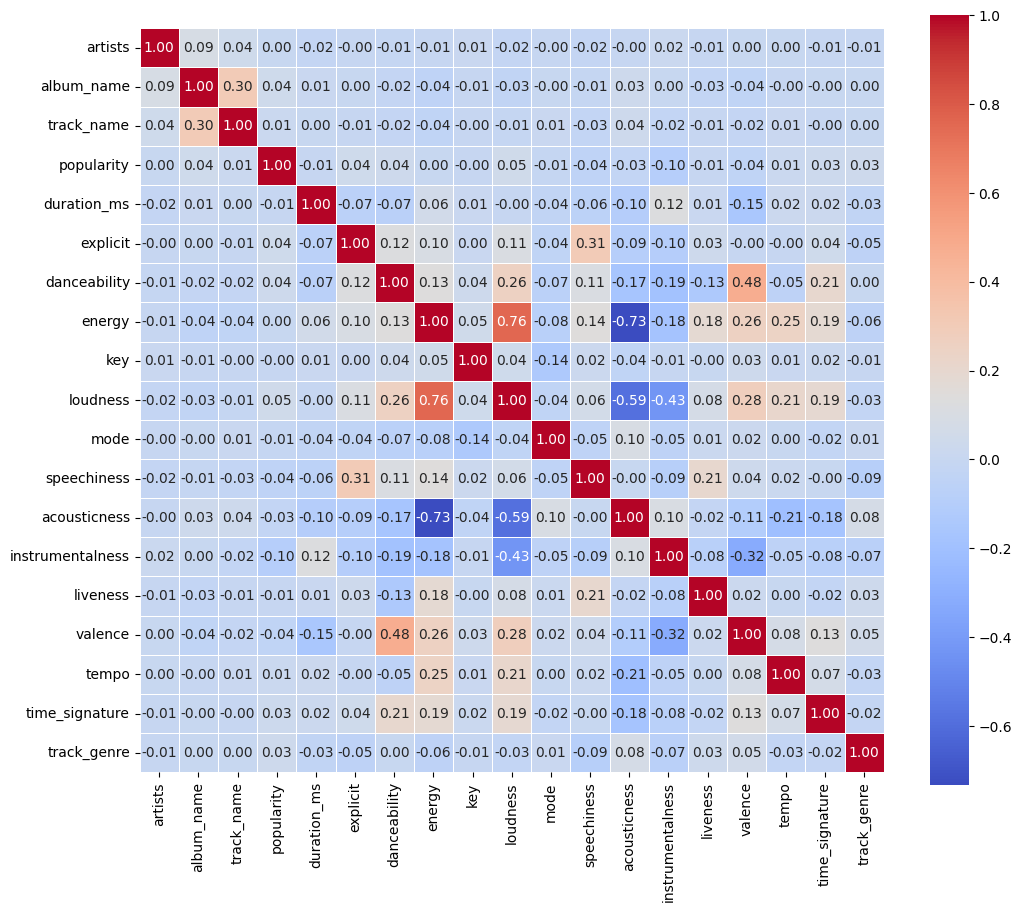

In [153]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    t_df.corr(),       
    annot=True,         
    fmt='.2f',          
    cmap='coolwarm',    
    linewidths=0.5,     
    square=True         
)

по матрице корреляции можно заметить наибольшую корреляцию между следующими столбцами:
* loudness и energy, что логично, ведь энергичная музыка не может быть не шумной\тихой. Но в то же время интересно, почему у energy почти нет корреляции с danceability, но есть отрицательная корреляция с acousticness. Также есть корреляция с valence и tempo.
* danceability в свою очередь коррелирует с valence, то есть позитивные песни больше других располагают к танцам.
* loudness также достаточно сильно отрицательно коррелирует с acousticness и instrumentalness, что наталкивает на мысль: акустические или инструментальные песни не такие шумные.
* popularity же, в свою очередь, ни с чем почти не коррелирует, что показывает, что в датасете нет моды на какие-то определенные жанры треков и он разнообразен.

**Рассмотрим отношения признаков с popularity** 

Но для начала изучим сам признак Popularity

In [154]:
t_df['popularity'].unique() #значения от 0 до 100

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


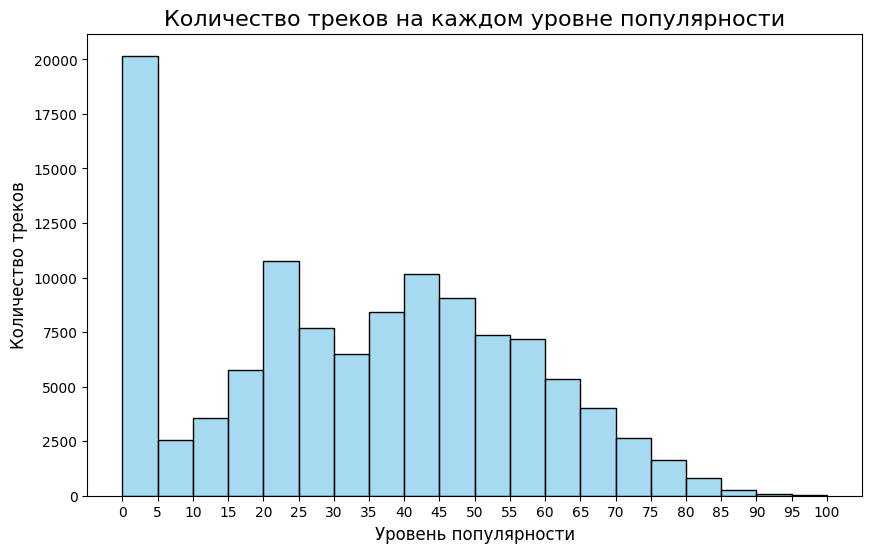

In [155]:
plt.figure(figsize=(10, 6))


sns.histplot(
    x=t_df['popularity'],  # Данные для оси X
    bins=range(0, 101, 5), # Интервалы популярности (0-100, шаг 5)
    kde=False,             # Без линии плотности
    color='skyblue'
)

plt.title('Количество треков на каждом уровне популярности', fontsize=16)
plt.xlabel('Уровень популярности', fontsize=12)
plt.ylabel('Количество треков', fontsize=12)
plt.xticks(range(0, 101, 5))  # Шаг по оси X
plt.show()

Ого, целых 20000 треков имеют популярность от 0 до 5. Хочу проверить, будут ли они сильно мешать при анализе. С этой целью создам третий датафрейм, где приближу показатели категории "от 0 до 5 популярности"  к показателям группы "от 10 до 15", на мой взгляд, так будет логичнее. Дальше на графиках проверим насколько сильно всё поменяется.


In [156]:
zero_popularity = t_df[t_df['popularity'] <5]

limited_zero_popularity = zero_popularity.head(3000)

non_zero_popularity = t_df[t_df['popularity'] > 5]

filtered_df = pd.concat([limited_zero_popularity, non_zero_popularity])


Выведем тот же график с новым датафреймом.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


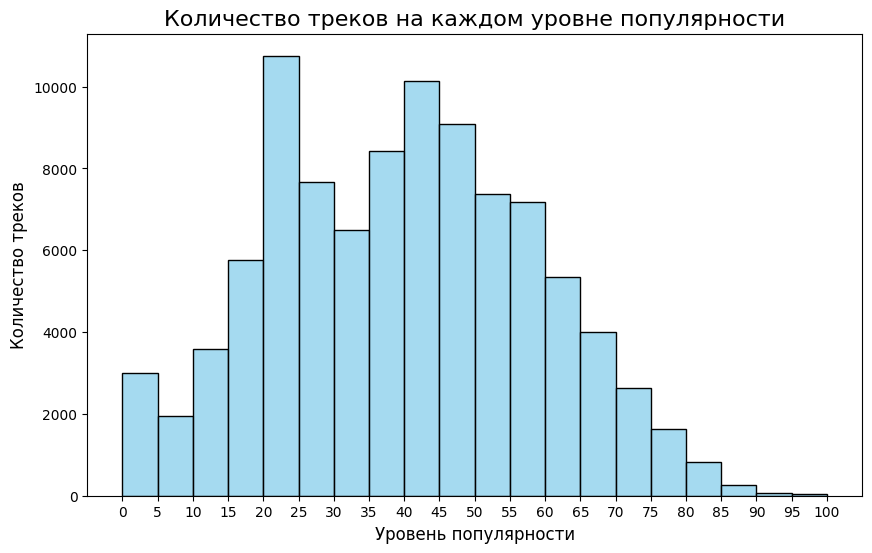

In [157]:
plt.figure(figsize=(10, 6))


sns.histplot(
    x=filtered_df['popularity'],  # Данные для оси X
    bins=range(0, 101, 5), # Интервалы популярности (0-100, шаг 5)
    kde=False,             # Без линии плотности
    color='skyblue'
)

# Подписи
plt.title('Количество треков на каждом уровне популярности', fontsize=16)
plt.xlabel('Уровень популярности', fontsize=12)
plt.ylabel('Количество треков', fontsize=12)
plt.xticks(range(0, 101, 5))  # Шаг по оси X
plt.show()

Проведём сравнения графиков. Первый будет от оригинального датафрейма.

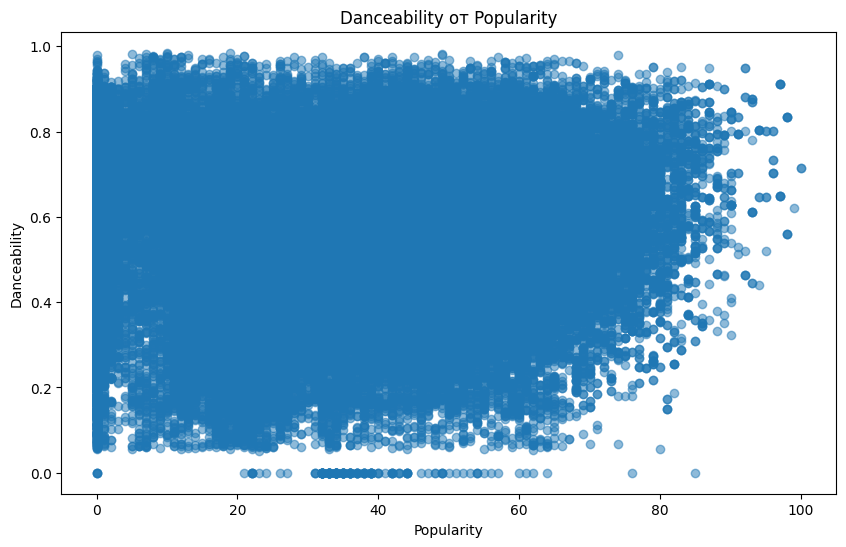

In [158]:
plt.figure(figsize=(10, 6))
plt.scatter(t_df['popularity'], t_df['danceability'],  alpha=0.5)  
plt.title('Danceability от Popularity')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.show()

По графику можно увидеть, что популярность в принципе никак не зависит от танцевальности (впрочем матрица корреляции не шутка же). И множество треков с 0 популярности имеют полный спектр танцевальности - от 0.0 до 1.0. По данному графику видно, что график без значений популярности от 0 до 5 отличаться не будет.

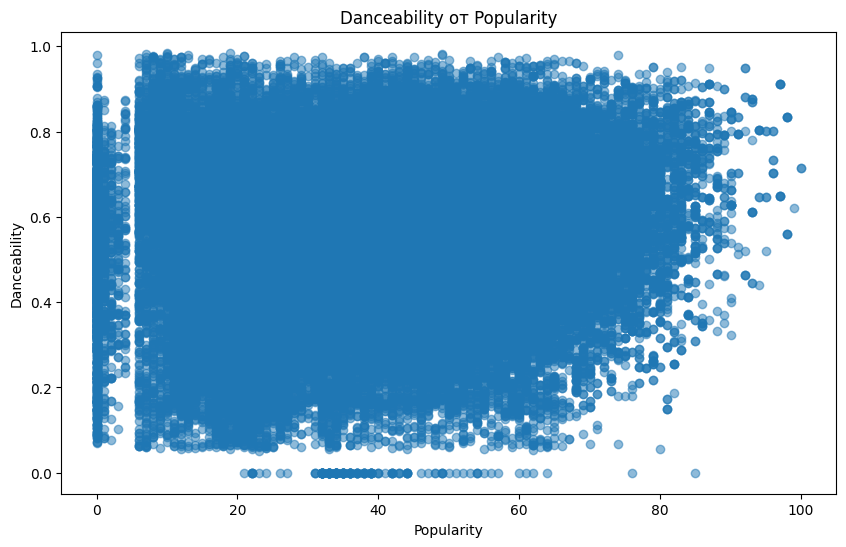

In [159]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['popularity'], filtered_df['danceability'],  alpha=0.5)  
plt.title('Danceability от Popularity')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.show()

Ожидаемо график такой же, только без значений в начале. Далее проанализируем значения danceability.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


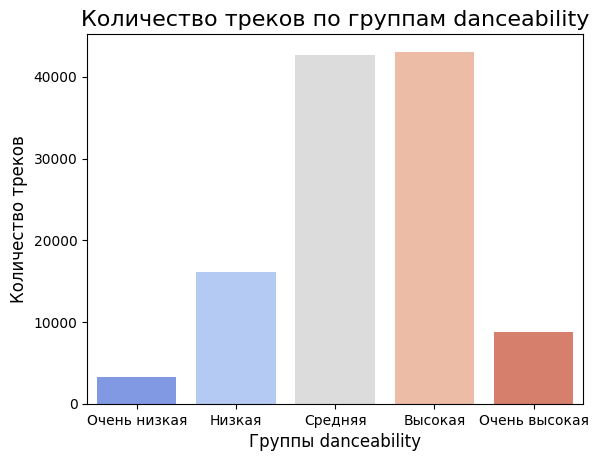

In [160]:
groups = pd.cut(
    t_df['danceability'], 
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
    labels=['Очень низкая', 'Низкая', 'Средняя', 'Высокая', 'Очень высокая']
)

sns.countplot(
    x=groups,
    palette='coolwarm'
)

plt.title('Количество треков по группам danceability', fontsize=16)
plt.xlabel('Группы danceability', fontsize=12)
plt.ylabel('Количество треков', fontsize=12)
plt.show()

Основная масса треков находится в диапазоне от 0.4 до 0.8 danceability.

/tmp/ipykernel_24/2139509281.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_popularity = t_df.groupby(groups)['popularity'].mean()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


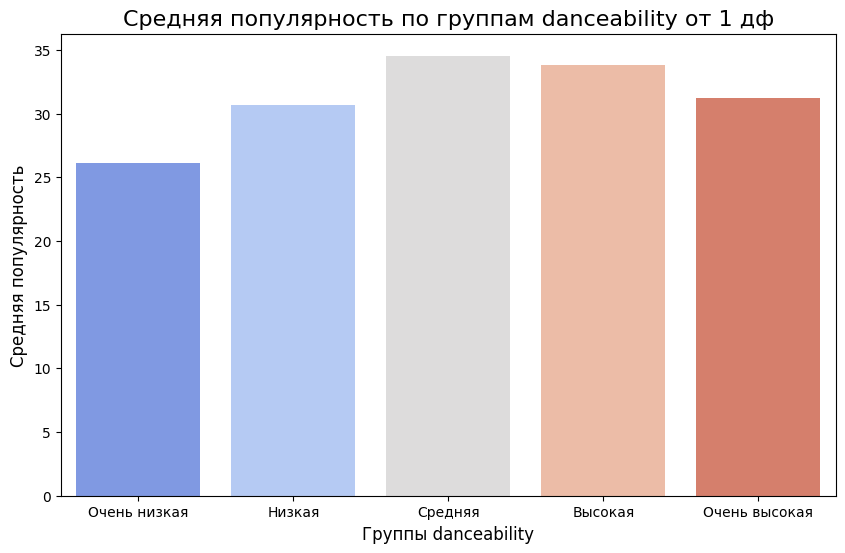

In [161]:
plt.figure(figsize=(10, 6))
average_popularity = t_df.groupby(groups)['popularity'].mean()
sns.barplot(
    x=average_popularity.index,   # Группы danceability
    y=average_popularity.values, # Средняя популярность
    palette='coolwarm'
)


plt.title('Средняя популярность по группам danceability от 1 дф', fontsize=16)
plt.xlabel('Группы danceability', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.show()

Но это показатели со всем спектром популярности. Проверим график отфильтрованного датафрейма.

/tmp/ipykernel_24/188431631.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_popularity = filtered_df.groupby(groups)['popularity'].mean()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


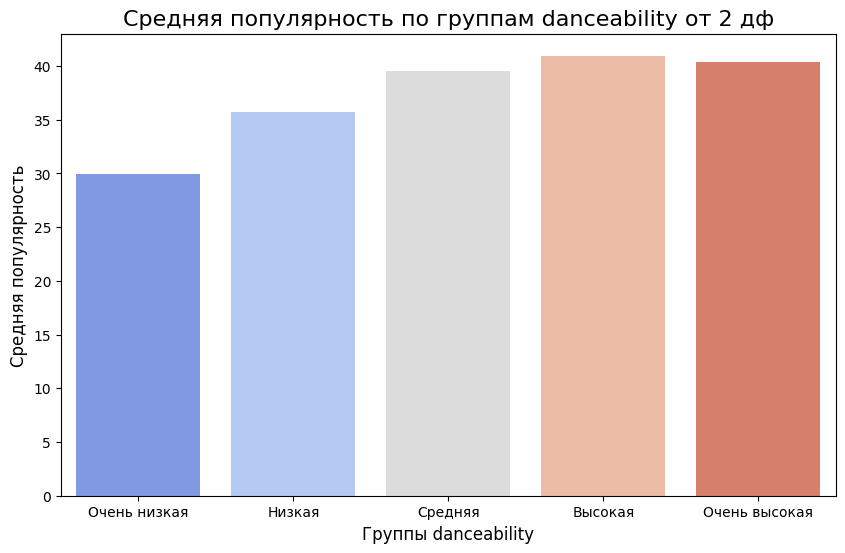

In [162]:
plt.figure(figsize=(10, 6))
average_popularity = filtered_df.groupby(groups)['popularity'].mean()
sns.barplot(
    x=average_popularity.index,   
    y=average_popularity.values, 
    palette='coolwarm'
)


plt.title('Средняя популярность по группам danceability от 2 дф', fontsize=16)
plt.xlabel('Группы danceability', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.show()

Они уже, в свою очередь, заметно различаются. В первом графике самая популярная группа - "Средняя", здесь же "Высокая", да и "очень высокая" во втором графике заметно больше. А так график очень полезный для дальнейшего feauture enginering'а.

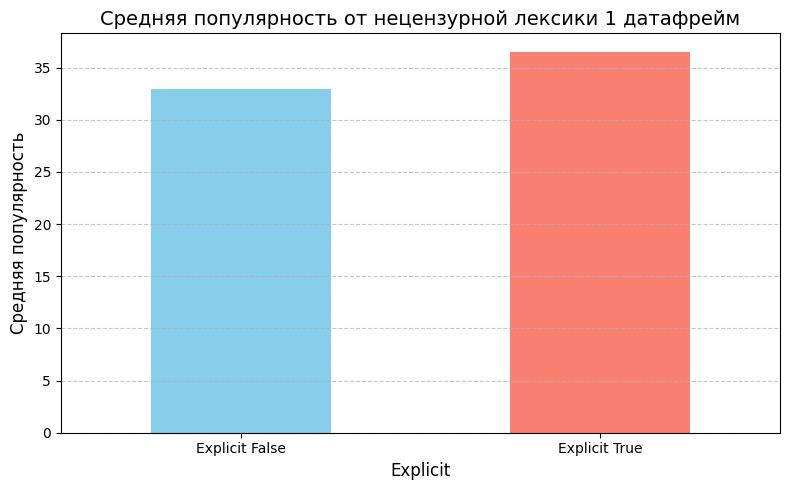

In [163]:
explicit_popularity = t_df.groupby('explicit')['popularity'].mean()

plt.figure(figsize=(8, 5))
explicit_popularity.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Средняя популярность от нецензурной лексики 1 датафрейм', fontsize=14)
plt.xlabel('Explicit', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Explicit False', 'Explicit True'], fontsize=10, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

В среднем песни с нецензурной лексикой популярнее остальных на всём датафрейме. Проверим на отфильтрованном.

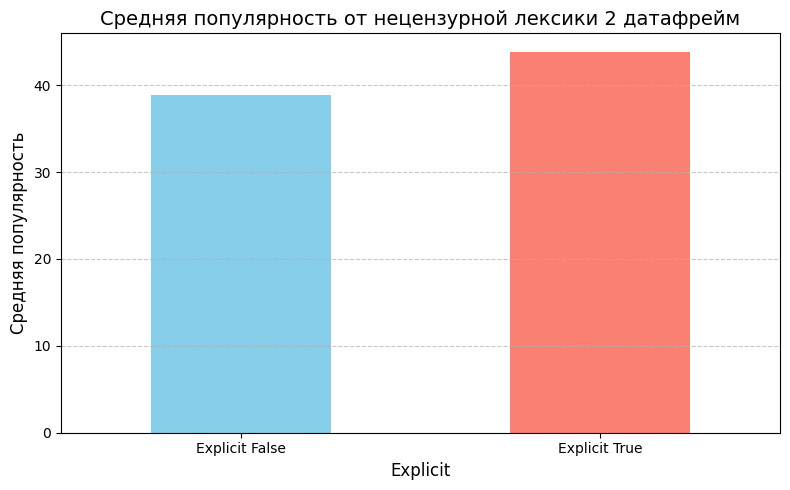

In [164]:
explicit_popularity = filtered_df.groupby('explicit')['popularity'].mean()

plt.figure(figsize=(8, 5))
explicit_popularity.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Средняя популярность от нецензурной лексики 2 датафрейм', fontsize=14)
plt.xlabel('Explicit', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Explicit False', 'Explicit True'], fontsize=10, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Здесь разница между ними уже заметнее. Пока что могу сделать вывод, что отфильтрованный датафрейм позволяет делать более наглядный анализ.

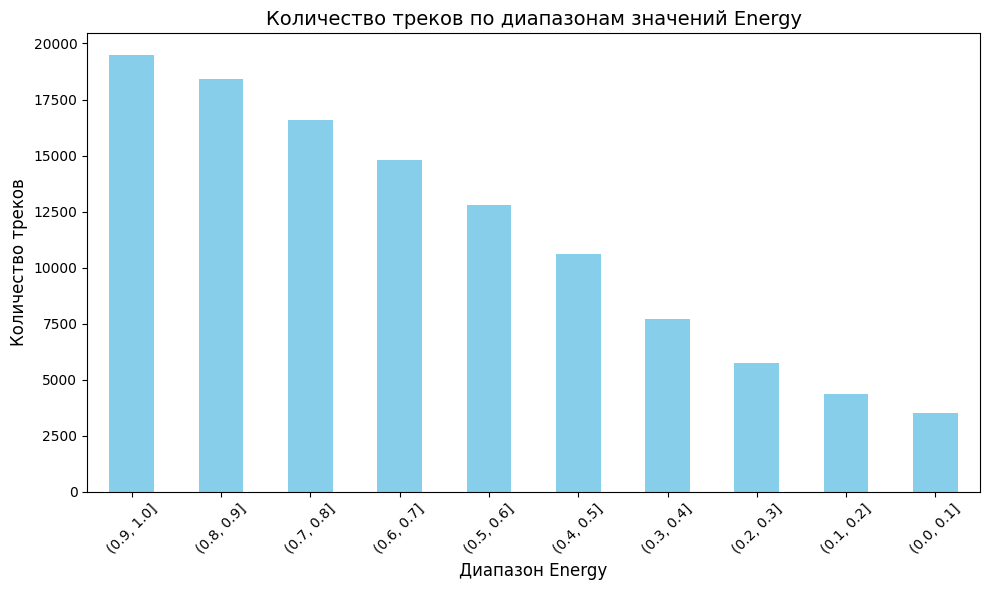

In [165]:
energy_bins = pd.cut(t_df['energy'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


energy_counts = energy_bins.value_counts()


plt.figure(figsize=(10, 6))
energy_counts.plot(kind='bar', color='skyblue')
plt.title('Количество треков по диапазонам значений Energy', fontsize=14)
plt.xlabel('Диапазон Energy', fontsize=12)
plt.ylabel('Количество треков', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

График очень красивый, но ни о чём вообще не говорит. 

/tmp/ipykernel_24/140596577.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_popularity_by_energy = t_df.groupby(energy_bins)['popularity'].mean()


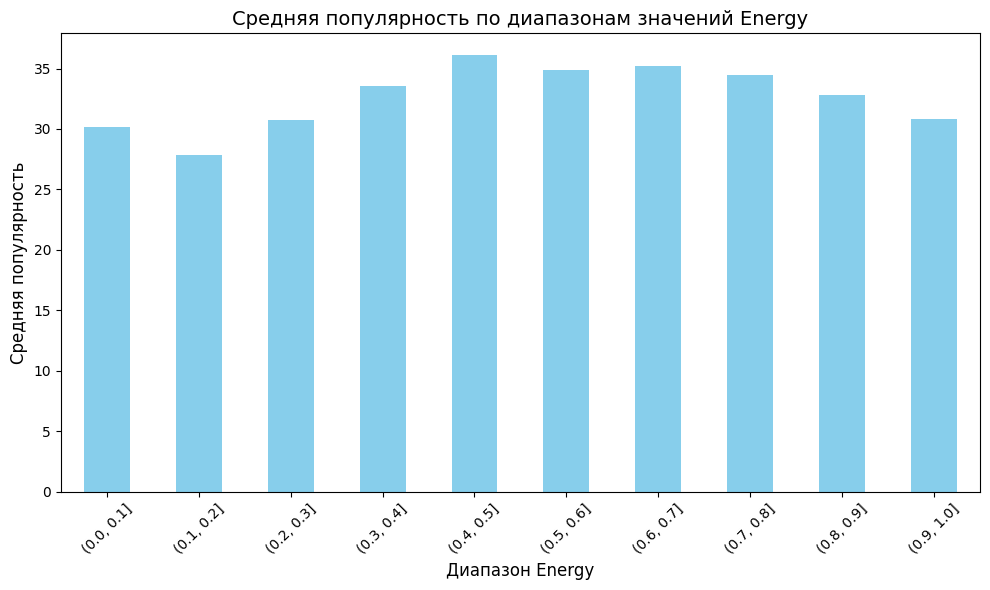

In [166]:
energy_bins = pd.cut(t_df['energy'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

average_popularity_by_energy = t_df.groupby(energy_bins)['popularity'].mean()


plt.figure(figsize=(10, 6))
average_popularity_by_energy.plot(kind='bar', color='skyblue')
plt.title('Средняя популярность по диапазонам значений Energy', fontsize=14)
plt.xlabel('Диапазон Energy', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

По графику можно увидеть, что наиболее популярны песни с energy больше 0.3 и меньше 0.8, но разница в популярности между всеми группами не такая значительная. Рассмотрим следующий признак.

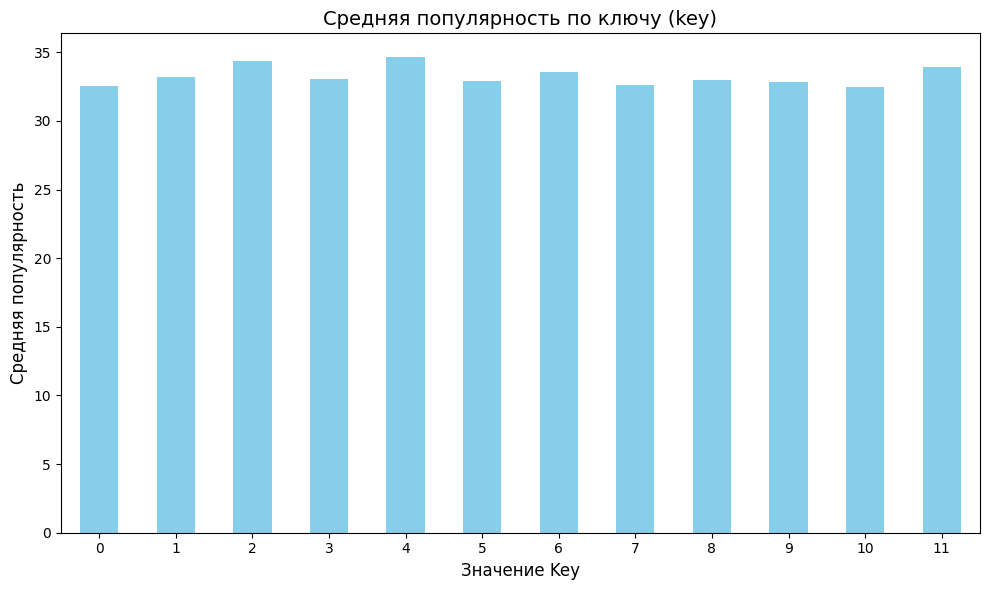

In [167]:
popularity_by_key = t_df.groupby('key')['popularity'].mean()


plt.figure(figsize=(10, 6))
popularity_by_key.plot(kind='bar', color='skyblue')
plt.title('Средняя популярность по ключу (key)', fontsize=14)
plt.xlabel('Значение Key', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Этот признак вообще ничего полезного не несёт. Переходим к следующему.


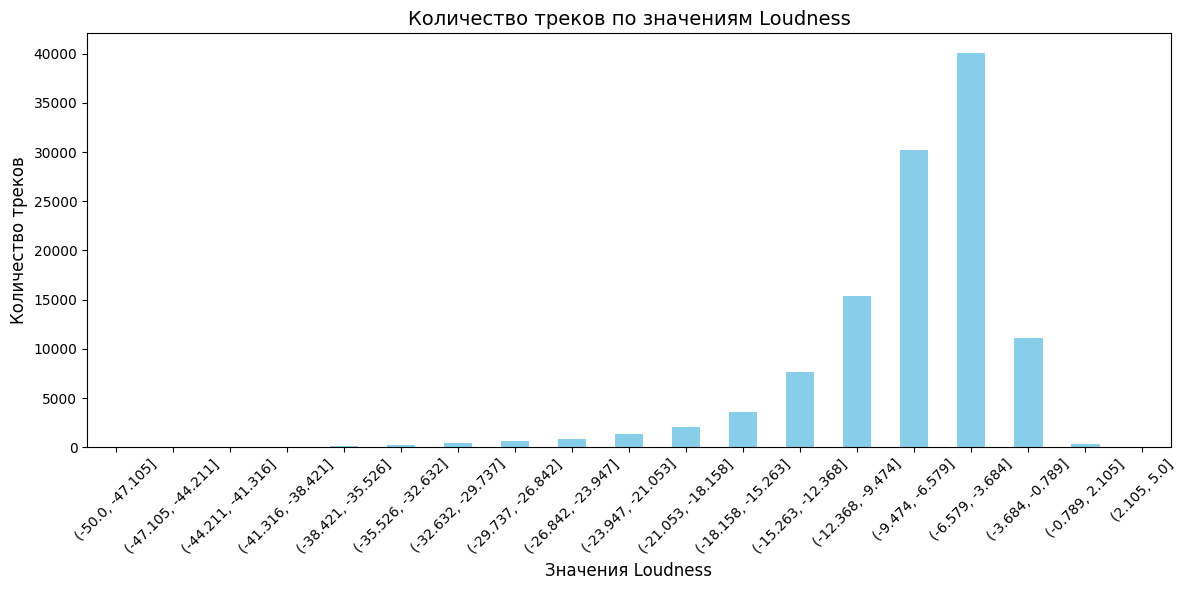

In [168]:
loudness_bins = np.linspace(-50, 5, 20)  
loudness_categories = pd.cut(t_df['loudness'], bins=loudness_bins)
track_count_by_loudness = loudness_categories.value_counts().sort_index()
plt.figure(figsize=(12, 6))
track_count_by_loudness.plot(kind='bar', color='skyblue')
plt.title('Количество треков по значениям Loudness', fontsize=14)
plt.xlabel('Значения Loudness', fontsize=12)
plt.ylabel('Количество треков', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Основная масса треков находится в диапазоне (-15.263; -3.684], а абсолютное большинство в (-6.579; -3.684].

/tmp/ipykernel_24/149117492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_loudness = t_df.groupby(loudness_categories)['popularity'].mean()


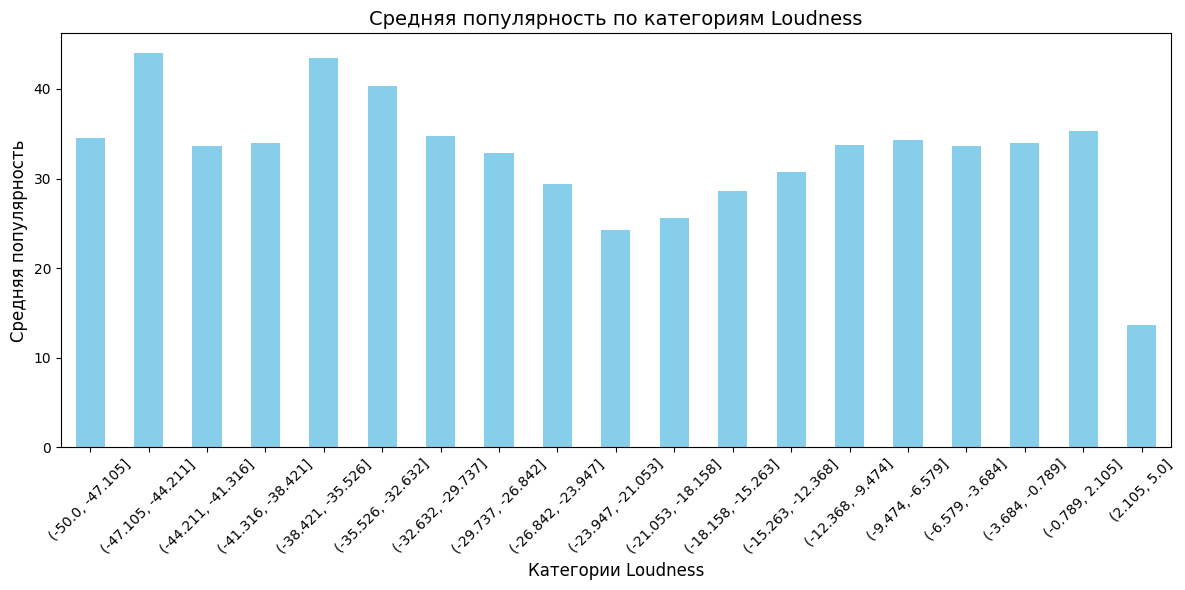

In [169]:
popularity_by_loudness = t_df.groupby(loudness_categories)['popularity'].mean()


plt.figure(figsize=(12, 6))
popularity_by_loudness.plot(kind='bar', color='skyblue')
plt.title('Средняя популярность по категориям Loudness', fontsize=14)
plt.xlabel('Категории Loudness', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

На дальнейшем feauture enginering'е никак по категориям loudness не разбить, все значения, кроме центральных и положительных групп примерно одинаковы. Пока далеко от loudness не ушли, проверим её взаимодействие с другими признаками.

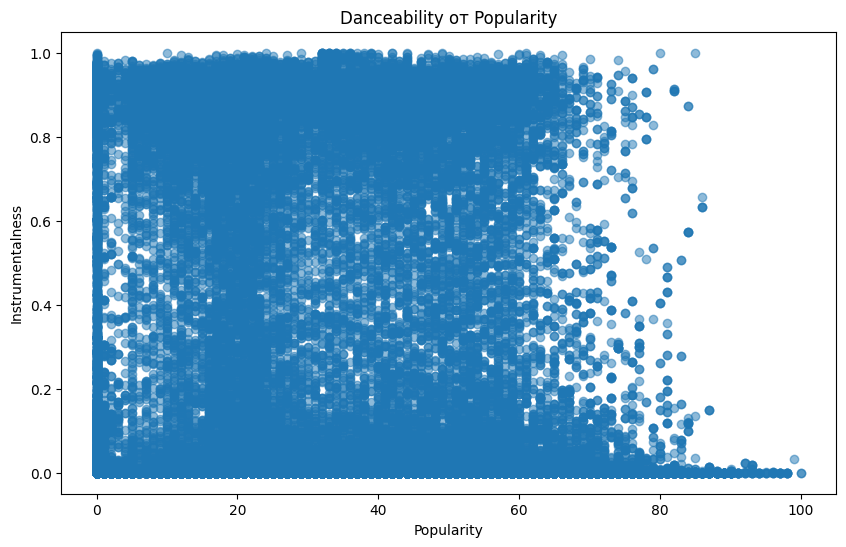

In [170]:
plt.figure(figsize=(10, 6))
plt.scatter(t_df['popularity'], t_df['instrumentalness'],  alpha=0.5)  
plt.title('Danceability от Popularity')
plt.xlabel('Popularity')
plt.ylabel('Instrumentalness')
plt.show()

У instrumentallness  наибольшая корреляция с popularity. По графику можно заметить, что есть точно такое же большое количество треков с 0 popularity, но совершенно разным instrumentalness. А так же то, что наиболее популярны треки либо с 0 instrumentallness либо с высоким его значением.

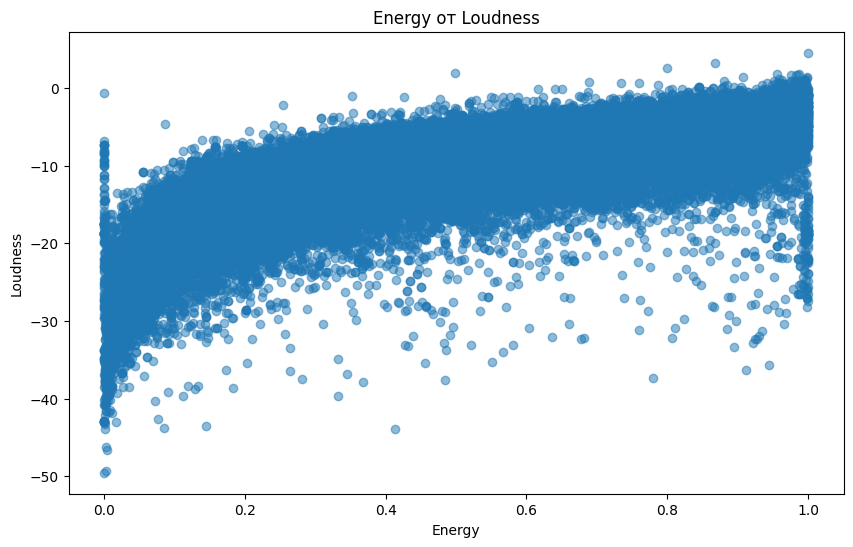

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(t_df['energy'], t_df['loudness'],  alpha=0.5)  
plt.title('Energy от Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

Значения действительно сильно коррелируют 
Можно будет с ними что то придумать при future enginering. Проверим дальше остальные корреляции.

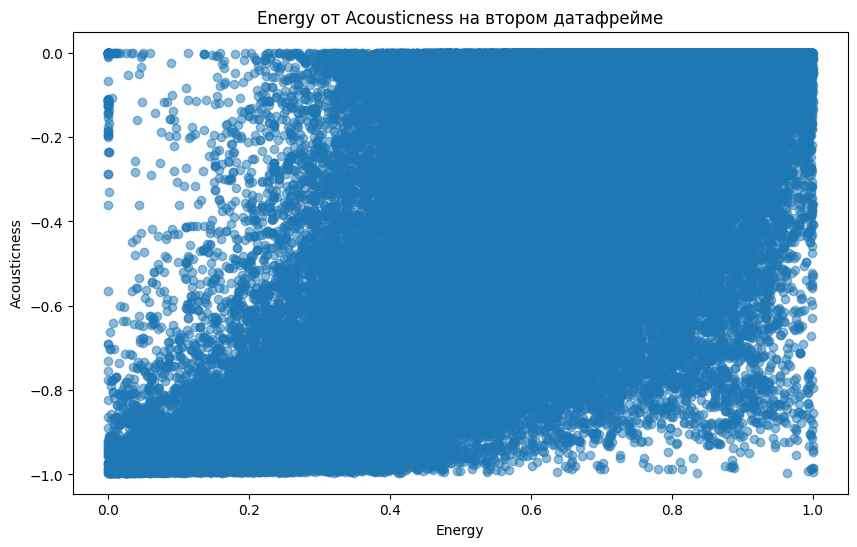

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['energy'], -filtered_df['acousticness'],  alpha=0.5)  # "-" так как корреляция отрицательная
plt.title('Energy от Acousticness на втором датафрейме')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.show()

А вот с acousticness отрицательной корреляции сильно не заметно.

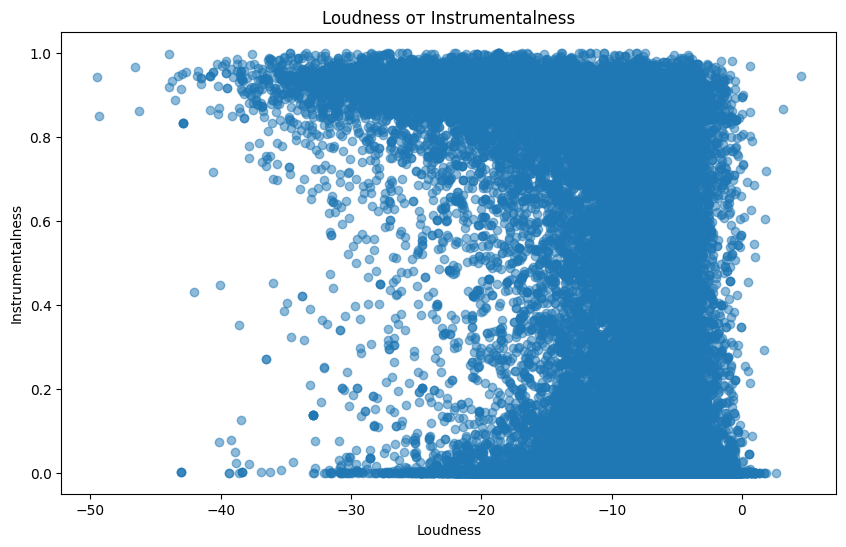

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(t_df['loudness'], t_df['instrumentalness'],  alpha=0.5)  
plt.title('Loudness от Instrumentalness')
plt.xlabel('Loudness')
plt.ylabel('Instrumentalness')
plt.show()

Данную корреляцию тоже всерьез рассматривать не стоит. Продолжим анализ признаков.

In [130]:
mode_popularity = t_df.groupby('mode')['popularity'].mean()

plt.figure(figsize=(8, 5))
mode_popularity.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Средняя популярность от mode', fontsize=14)
plt.xlabel('Mode', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Mode 0', 'Mode 1'], fontsize=10, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Средняя популярность почти идентична, данный признак тоже не совсем понимаю как использовать

**графики для 1 датафрейма, то есть оригинального**

In [131]:
plt.figure(figsize=(15, 12))
features = [ 'acousticness', 'liveness', 'instrumentalness', 'valence', 'tempo', 'speechiness']

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    

    bins = np.linspace(t_df[feature].min(), t_df[feature].max(), 6)
    temp_groups = pd.cut(t_df[feature], bins=bins)

    mean_popularity = t_df.groupby(temp_groups)['popularity'].mean()

    sns.barplot(x=mean_popularity.index.astype(str), y=mean_popularity.values)
    
    plt.title(f'{feature} vs Средняя популярность')
    plt.xlabel(f'Группы {feature}')
    plt.ylabel('Средняя популярность')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_24/4181448192.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_popularity = t_df.groupby(temp_groups)['popularity'].mean()
/tmp/ipykernel_24/4181448192.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_popularity = t_df.groupby(temp_groups)['popularity'].mean()
/tmp/ipykernel_24/4181448192.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_popularity = t_df.groupby(temp_groups)['pop

**графики для второго датасета, где значений в популярности от 0 до 5 не 20000, а 3000**

/tmp/ipykernel_24/1419943268.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_popularity = filtered_df.groupby(feature + '_group')['popularity'].mean()
/tmp/ipykernel_24/1419943268.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_popularity = filtered_df.groupby(feature + '_group')['popularity'].mean()
/tmp/ipykernel_24/1419943268.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_popularity = fi

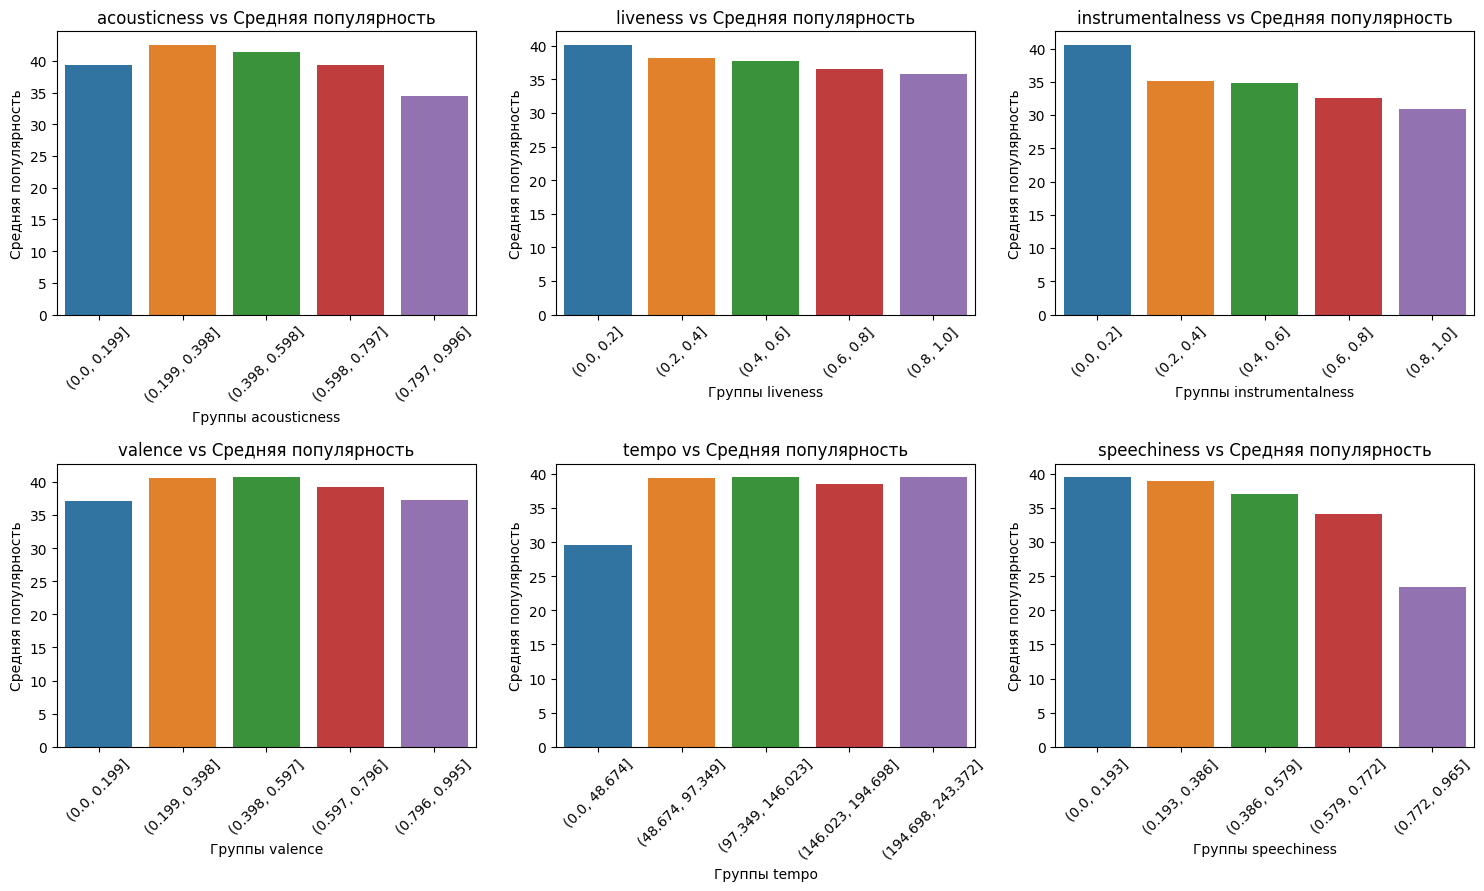

In [132]:
plt.figure(figsize=(15, 12))
features = [ 'acousticness', 'liveness', 'instrumentalness', 'valence', 'tempo', 'speechiness']

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  
    
 
    bins = np.linspace(filtered_df[feature].min(), filtered_df[feature].max(), 6)  
    filtered_df[feature + '_group'] = pd.cut(filtered_df[feature], bins=bins)
    

    mean_popularity = filtered_df.groupby(feature + '_group')['popularity'].mean()

    sns.barplot(x=mean_popularity.index.astype(str), y=mean_popularity.values)
    
    plt.title(f'{feature} vs Средняя популярность')
    plt.xlabel(f'Группы {feature}')
    plt.ylabel('Средняя популярность')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Проанализировав графики, можно сделать вывод, что в дальнейшем feauture enginering'е имеет смысл попробовать заменить столбцы speechiness, instrumentalness, acousticness, valence и tempo на столбец с их группами. А если подводить итог эксперимента с разделением на два датафрейма, то графики в принципе почти ничем не отличаются. Можно сделать второй вывод, что нулевые значения популярити не мешают анализу и навряд ли помешают обучению.

**Рассмотрим дальше самые популярные значения**

In [172]:
#Переведём длительность треков из милисекунд в минуты для удобства анализа и обучения модели.
t_df['duration_minutes'] = t_df['duration_ms'] / 60000
t_df.drop('duration_ms', axis = 1, inplace = True)
t_df

KeyError: 'duration_ms'

Text(0, 0.5, 'Популярность')

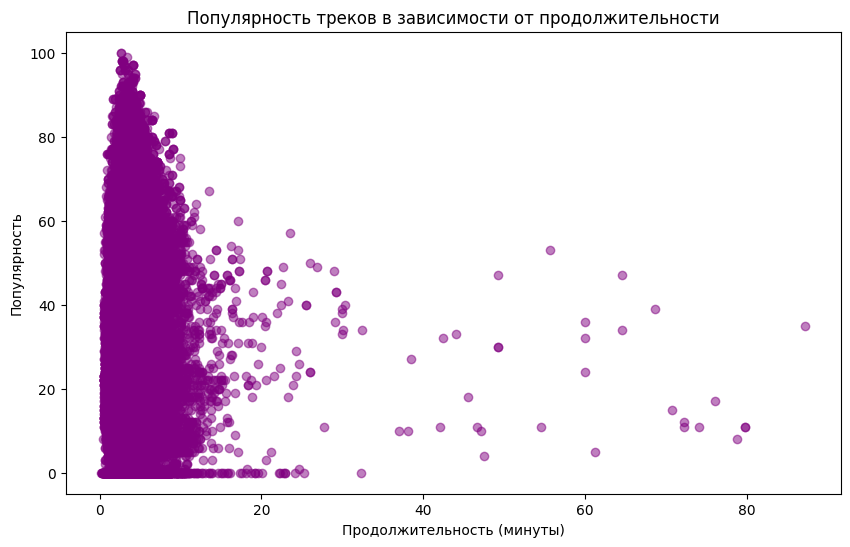

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(t_df['duration_minutes'], t_df['popularity'], alpha=0.5, color='purple')
plt.title('Популярность треков в зависимости от продолжительности')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Популярность')


Длительность большинства популярных треков да и треков в общем не превышает 15 минут. Думаю, полезно будет сделать график для данной категории отдельно.

In [135]:
plt.figure(figsize=(10, 6))
data_filtered = t_df[(t_df['duration_minutes'])<=15]
plt.scatter(data_filtered['duration_minutes'], data_filtered['popularity'], alpha=0.5, color='purple')
plt.title('Популярность треков в зависимости от продолжительности')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Популярность')


Text(0, 0.5, 'Популярность')

На графике можно увидеть, что абсолютное большинство треков находится в пределах от 2 до примерно 4.5 минут, чуть поменьше от 1 до 2 и от 5 до 7-8 минут, после 8 минут наблюдается спад количества треков. Попробую разделить треки на группы.

In [173]:
t_df['duration_category'] = pd.cut(
    t_df['duration_minutes'], 
    bins=[0, 2, 4, 8, 20, float('inf')],  
    labels=['Short', 'Medium', 'Long', 'Very long', 'Audiobooks and concerts']  
)
t_df

artists  album_name  track_name  popularity  explicit  danceability  \
0         10357        8100       11741          73     False         0.676   
1          3287       14796       22528          55     False         0.420   
2         12397       39162       60774          57     False         0.438   
3         14839        8580        9580          71     False         0.266   
4          5255       16899       25689          82     False         0.618   
...         ...         ...         ...         ...       ...           ...   
113995    22486          66       53329          21     False         0.172   
113996    22486          66       65090          22     False         0.174   
113997     4952        5028       38207          22     False         0.629   
113998    18534        7238       21507          41     False         0.587   
113999     4952       24357        5999          22     False         0.526   

        energy  key  loudness  mode  speechiness  acousticness  \
0       0.4610    1    -6.746     0       0.1430        0.0322   
1       0.1660    1   -17.235     1       0.0763        0.9240   
2       0.3590    0    -9.734     1       0.0557        0.2100   
3       0.0596    0   -18.515     1       0.0363        0.9050   
4       0.4430    2    -9.681     1       0.0526        0.4690   
...        ...  ...       ...   ...          ...           ...   
113995  0.2350    5   -16.393     1       0.0422        0.6400   
113996  0.1170    0   -18.318     0       0.0401        0.9940   
113997  0.3290    0   -10.895     0       0.0420        0.8670   
113998  0.5060    7   -10.889     1       0.0297        0.3810   
113999  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  duration_minutes duration_category  
0                 0          3.844433            Medium  
1                 0          2.493500            Medium  
2                 0          3.513767            Medium  
3                 0          3.365550            Medium  
4                 0          3.314217            Medium  
...             ...               ...               ...  
113995          113          6.416650              Long  
113996          113          6.416667              Long  
113997          113          4.524433              Long  
113998          113          4.731550              Long  
113999          113          4.030433              Long  

[113999 rows x 20 columns]

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


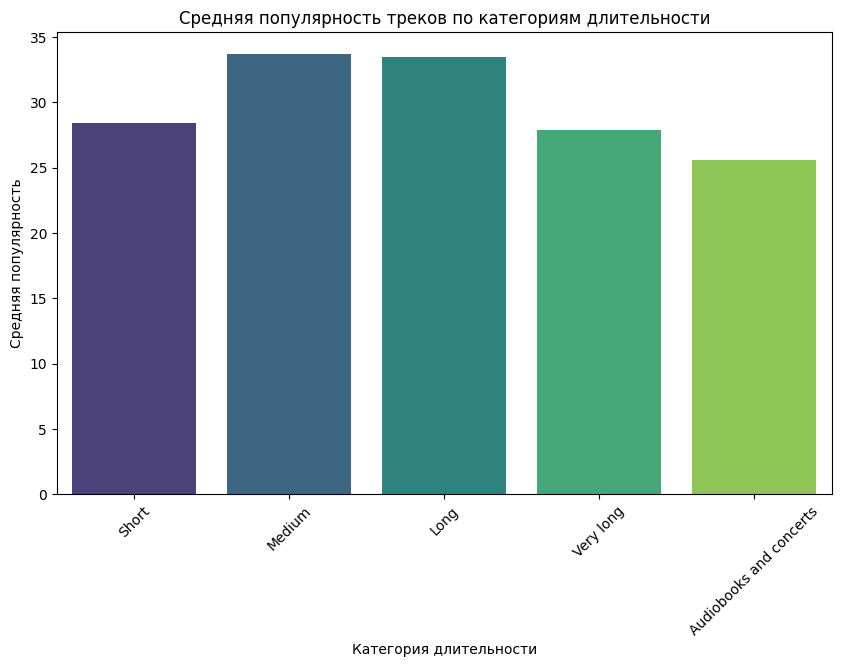

In [137]:
plt.figure(figsize=(10, 6))
sns.barplot(data=t_df, x='duration_category', y='popularity', errorbar=None, palette='viridis')
plt.title('Средняя популярность треков по категориям длительности')
plt.xlabel('Категория длительности')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=45)
plt.show()

График даёт понять, что треки средней и длинной категории наиболее популярны, но их отрыв не столь велик. Все группы имеют не сильно большую разницу.

In [174]:
#возвращаем категориальные данные чтобы построить графики
t_df['track_genre'] = data['track_genre']
t_df['artists'] = data['artists']
t_df['track_name'] = data['track_name']
t_df['album_name'] = data['album_name']
t_df

artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  explicit  danceability  \
0                           Comedy          73     False         0.676   
1                 Ghost - Acoustic          55     False         0.420   
2                   To Begin Again          57     False         0.438   
3       Can't Help Falling In Love          71     False         0.266   
4                          Hold On          82     False         0.618   
...                            ...         ...       ...           ...   
113995         Sleep My Little Boy          21     False         0.172   
113996            Water Into Light          22     False         0.174   
113997              Miss Perfumado          22     False         0.629   
113998                     Friends          41     False         0.587   
113999                   Barbincor          22     False         0.526   

        energy  key  loudness  mode  speechiness  acousticness  \
0       0.4610    1    -6.746     0       0.1430        0.0322   
1       0.1660    1   -17.235     1       0.0763        0.9240   
2       0.3590    0    -9.734     1       0.0557        0.2100   
3       0.0596    0   -18.515     1       0.0363        0.9050   
4       0.4430    2    -9.681     1       0.0526        0.4690   
...        ...  ...       ...   ...          ...           ...   
113995  0.2350    5   -16.393     1       0.0422        0.6400   
113996  0.1170    0   -18.318     0       0.0401        0.9940   
113997  0.3290    0   -10.895     0       0.0420        0.8670   
113998  0.5060    7   -10.889     1       0.0297        0.3810   
113999  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  duration_minutes duration_category  
0          acoustic          3.844433            Medium  
1          acoustic          2.493500            Medium  
2          acoustic          3.513767            Medium  
3          acoustic          3.365550            Medium  
4          acoustic          3.314217       

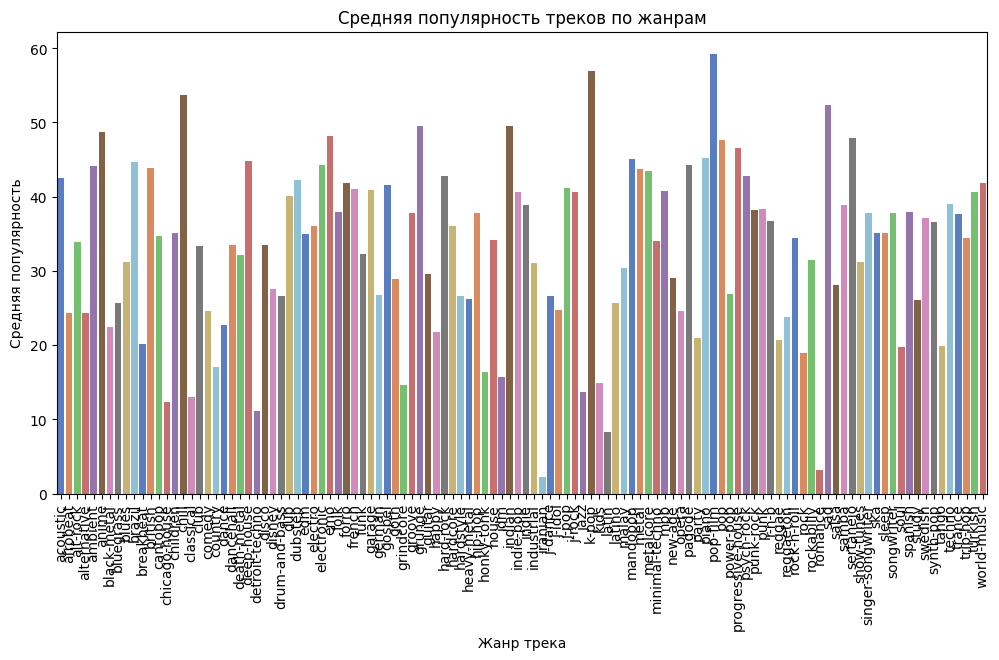

In [139]:
plt.figure(figsize=(12, 6))
sns.barplot(data=t_df, x='track_genre', y='popularity', errorbar=None, palette='muted')
plt.title('Средняя популярность треков по жанрам')
plt.xlabel('Жанр трека')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=90)
plt.show()

Жанров слишком много. Придётся разбивать на два графика - 15 самых популярных и 15 самых непопулярных.

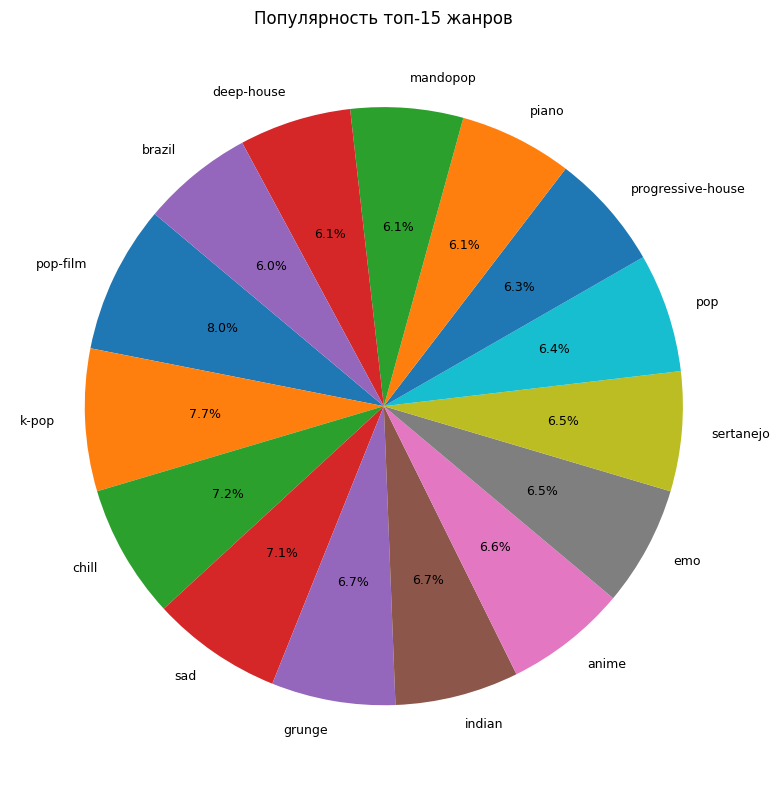

In [140]:
genre_popularity = t_df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
top_15_genres = genre_popularity.head(15)
labels = top_15_genres.index  
sizes = top_15_genres.values  
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': '9'})
plt.title('Популярность топ-15 жанров')
plt.tight_layout()
plt.show()

Одними из самых популярных являются такие жанры как:
* pop-film - как я понимаю это поп музыка из фильмов
* много национальной музыки: brazil, indian 
* также есть k-pop, anime, sertanejo, mandopop, которые являются культовыми и по сути в некой степени тоже национальным для Южной Кореи, Японии, Бразилии и Китая.
* chill,sad как музыка под настроение, что странно на мой взгляд, я не думаю, что это можно считать за суверенные жанры.
* и остальные 

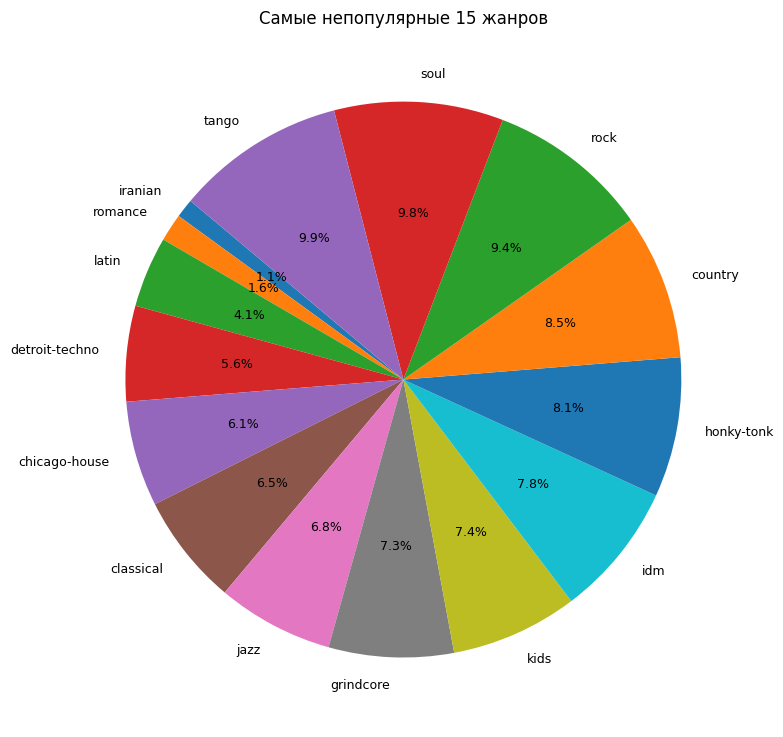

In [141]:
genre_popularity = t_df.groupby('track_genre')['popularity'].mean().sort_values(ascending=True)
bottom_15_genres = genre_popularity.head(15)
labels = bottom_15_genres.index  
sizes = bottom_15_genres.values  
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': '9'})
plt.title('Самые непопулярные 15 жанров')
plt.tight_layout()
plt.show()

А самые непопулярные это в основном глубокие музыкальные поджанры,чуть чуть национальных,
а также не актуальные на сегодня джаз и классическая музыка.

Далее выведем список из 15 самых популярных исполнителей.

In [ ]:
artist_popularity = t_df.groupby('artists')['popularity'].mean().sort_values(ascending=False)

top_artists = artist_popularity.head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Топ-15 популярных артистов')
plt.xlabel('Средняя популярность')
plt.ylabel('Артисты')
plt.tight_layout()
plt.show()

По списку можно увидеть что множество из этого топа - это коллаборации, они примечательны тем,
что содержат в себе ";". Быть может они в среднем популярнее?. За это и зацепимся.


In [175]:
collaborations = t_df[t_df['artists'].str.contains(';')]

num_collaborations = collaborations.shape[0]
print(num_collaborations) 

30075


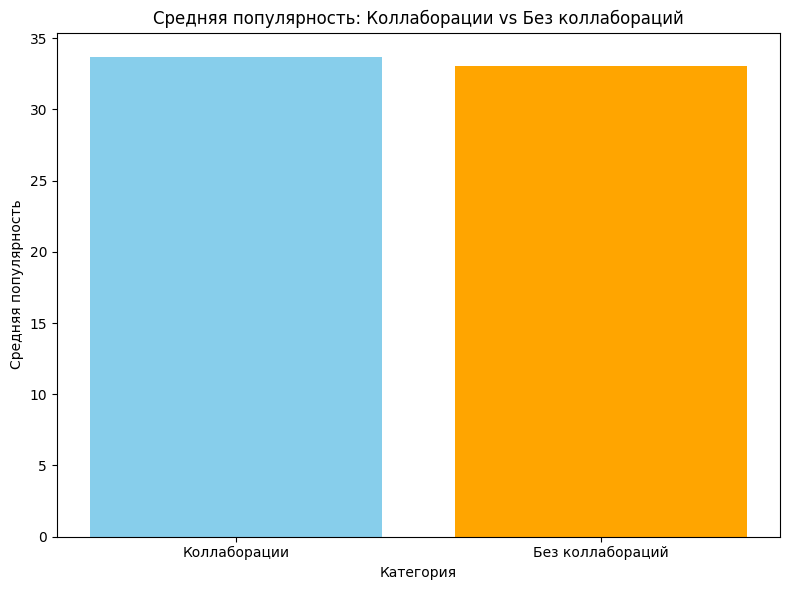

In [176]:
collaborations = t_df[t_df['artists'].str.contains(';')]
non_collaborations = t_df[~t_df['artists'].str.contains(';')]

avg_pop_collaborations = collaborations['popularity'].mean()
avg_pop_non_collaborations = non_collaborations['popularity'].mean()
categories = ['Коллаборации', 'Без коллабораций']
values = [avg_pop_collaborations, avg_pop_non_collaborations]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'orange'])
plt.title('Средняя популярность: Коллаборации vs Без коллабораций')
plt.ylabel('Средняя популярность')
plt.xlabel('Категория')
plt.tight_layout()
plt.show()

Моя гипотеза обречена на провал. Коллаборации в среднем популярны так же как и обычные треки. Тогда хочу проверить, зависит ли популярность трека от количества исполнителей, ведь у трека может быть и 2-ое и трое, и большее их количество. 


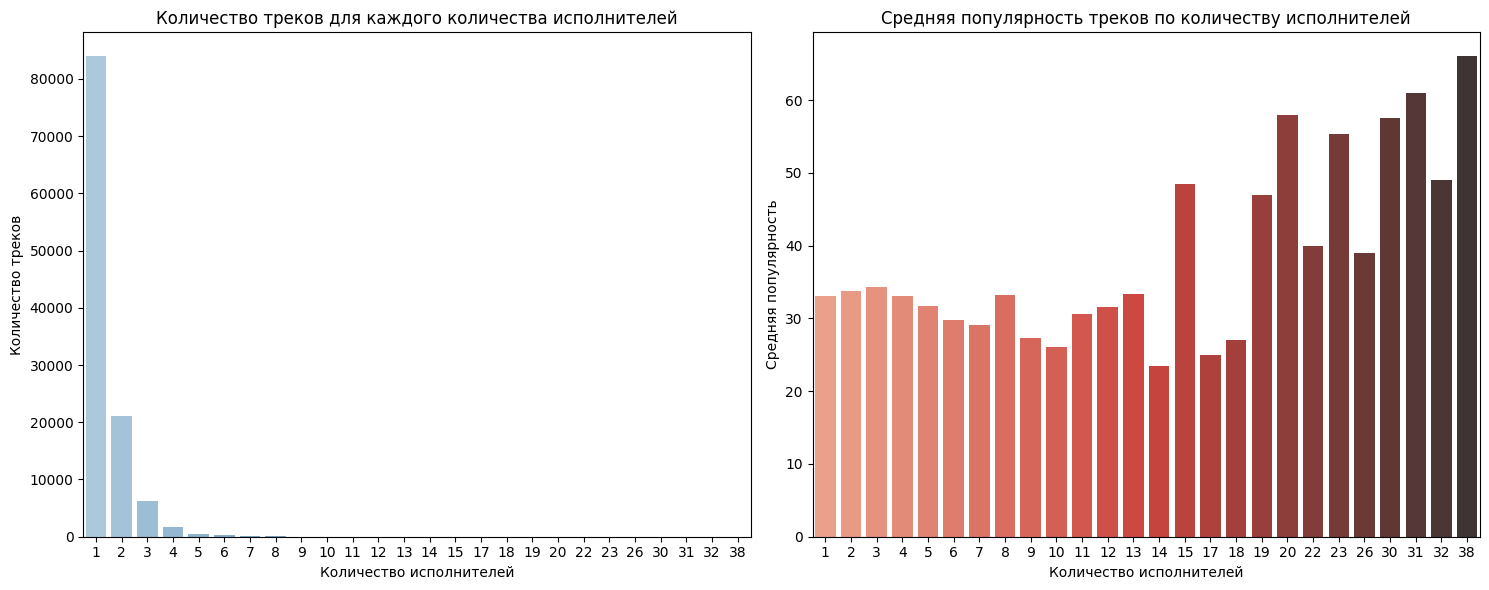

In [177]:

t_df['artist_count'] = t_df['artists'].apply(lambda x: len(x.split(';')))

avg_popularity_by_artists = t_df.groupby('artist_count')['popularity'].mean()
track_count_by_artists = t_df['artist_count'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=track_count_by_artists.index, y=track_count_by_artists.values, ax=axes[0], palette='Blues_d')
axes[0].set_title('Количество треков для каждого количества исполнителей')
axes[0].set_xlabel('Количество исполнителей')
axes[0].set_ylabel('Количество треков')

sns.barplot(x=avg_popularity_by_artists.index, y=avg_popularity_by_artists.values, ax=axes[1], palette='Reds_d')
axes[1].set_title('Средняя популярность треков по количеству исполнителей')
axes[1].set_xlabel('Количество исполнителей')
axes[1].set_ylabel('Средняя популярность')


plt.tight_layout()
plt.show()

И да, действительно, серьезный всплеск популярности возникает в треках с числом исполнителей >18, правда я не совсем понимаю как такое большое количество авторов может быть у одного трека. А так как я уже делал график с 15 самыми популярными исполнителями, имеет место предположение, что столбец авторов можно заменить двумя столбцами, с количеством авторов трека и булевым столбцом "это суперзвезда?", то есть один из например 100 самых популярных исполнителей.

/tmp/ipykernel_24/1365325896.py:17: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_24/1365325896.py:17: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_24/1365325896.py:17: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


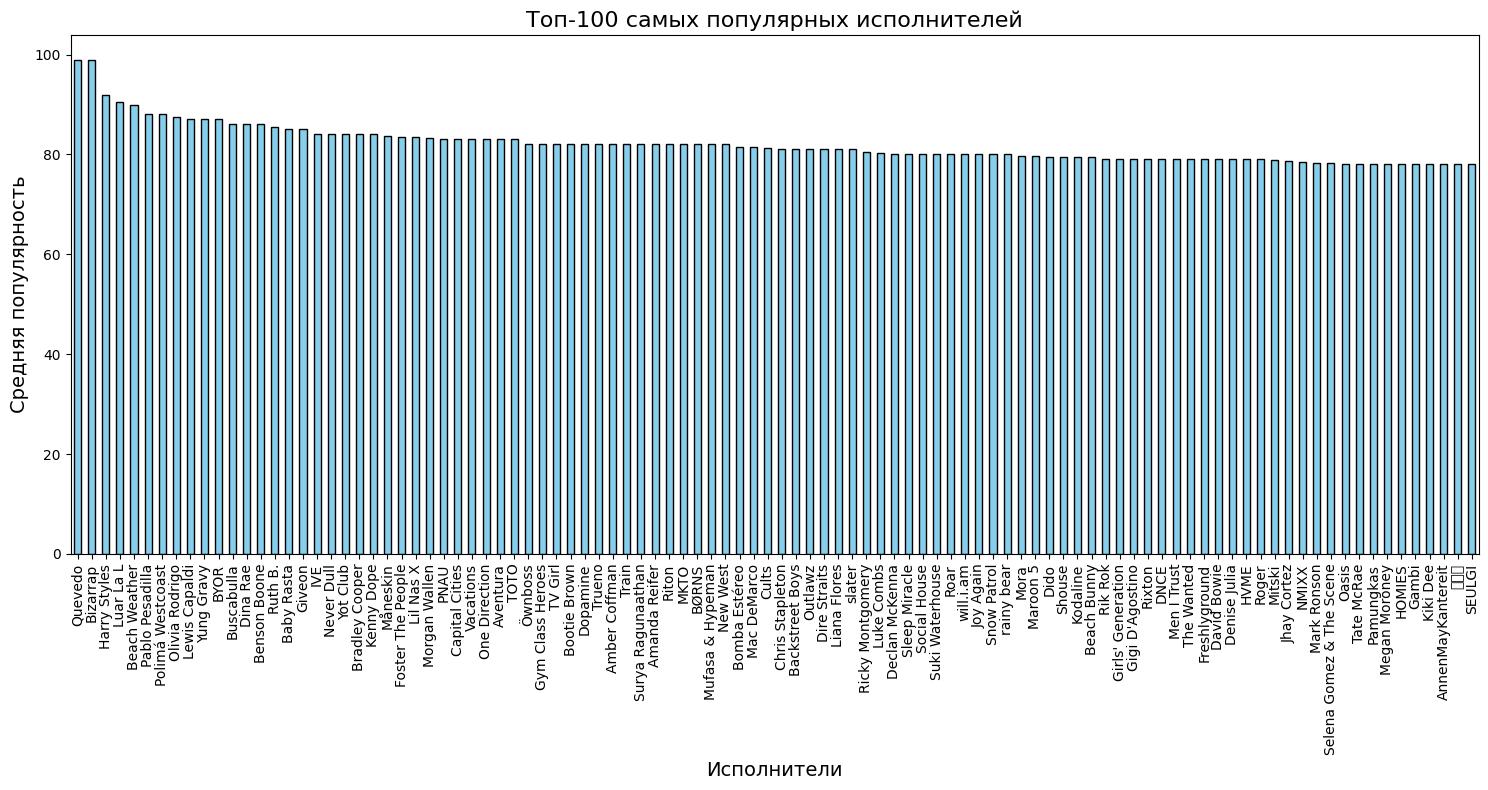

In [178]:
artists_df = t_df[['artists', 'popularity']].copy()
artists_df['artists'] = artists_df['artists'].str.split(';')
artists_df = artists_df.explode('artists')


artist_popularity = artists_df.groupby('artists')['popularity'].mean().sort_values(ascending=False)


top_100_artists = artist_popularity.head(100)

plt.figure(figsize=(15, 8))
top_100_artists.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Топ-100 самых популярных исполнителей', fontsize=16)
plt.xlabel('Исполнители', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

Сейчас разделил всех по одиночке и стало нагляднее. У каждого из ста примерно одинаковый уровень популярности. Обозначим их всех суперзвёздами. Далее изучим названия треков и альбомов.

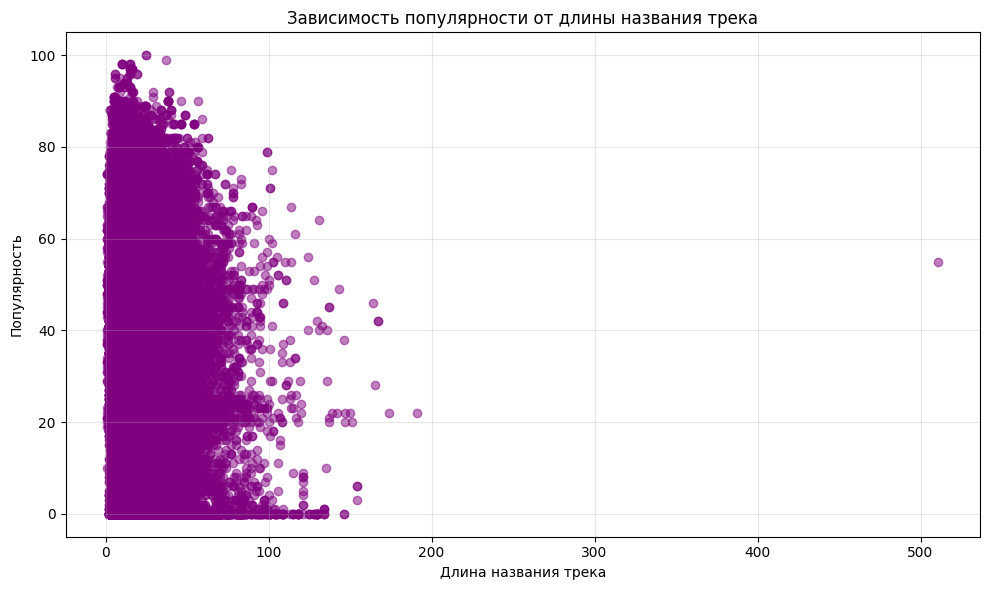

In [179]:

plt.figure(figsize=(10, 6))
plt.scatter(t_df['track_name'].str.len(), t_df['popularity'], alpha=0.5, color='purple')
plt.title('Зависимость популярности от длины названия трека')
plt.xlabel('Длина названия трека')
plt.ylabel('Популярность')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Большинство треков содержат в названии меньше 100 символов. А наиболее популярные - меньше 50 символов. Так что думаю гипотезу можно считать успешной - чем короче название трека, тем он популярнее.

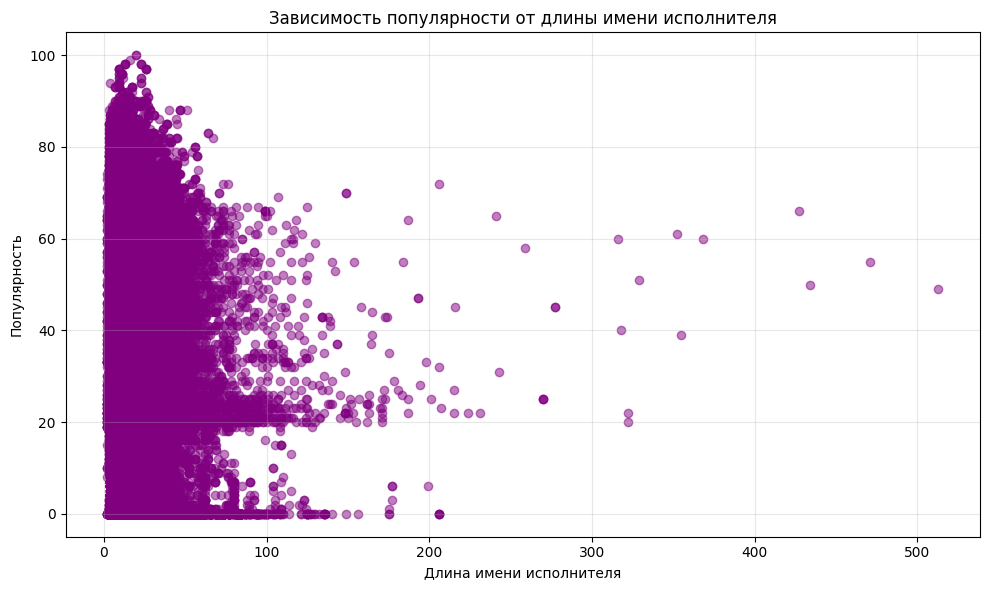

In [180]:

plt.figure(figsize=(10, 6))
plt.scatter(t_df['artists'].str.len(), t_df['popularity'], alpha=0.5, color='purple')
plt.title('Зависимость популярности от длины имени исполнителя')
plt.xlabel('Длина имени исполнителя')
plt.ylabel('Популярность')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

По графику можно также увидеть, что чем короче имя исполнителя, тем трек популярнее в основном. И в завершение рассмотрим название альбома.  Выведем Топ 20 самых популярных альбомов.



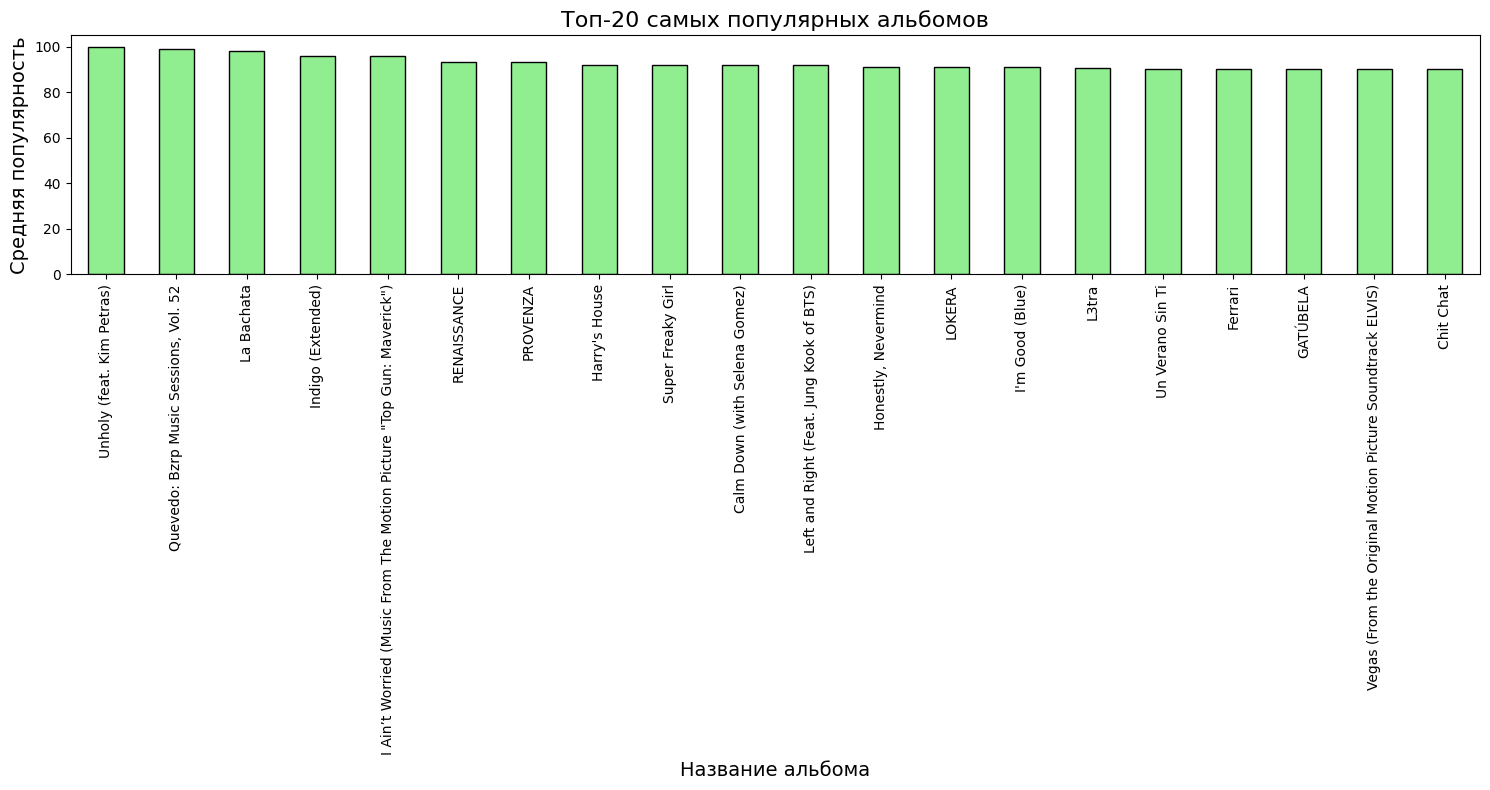

In [181]:
album_popularity = t_df.groupby('album_name')['popularity'].mean().sort_values(ascending=False)
top_20_albums = album_popularity.head(20)
plt.figure(figsize=(15, 8))
top_20_albums.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Топ-20 самых популярных альбомов', fontsize=16)
plt.xlabel('Название альбома', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

А вот это интересно, в топе много коллабораций  они обозначаются через feat. или with, а также пара саундтреков они обозначаются через *from the*... За это и зацепимся.

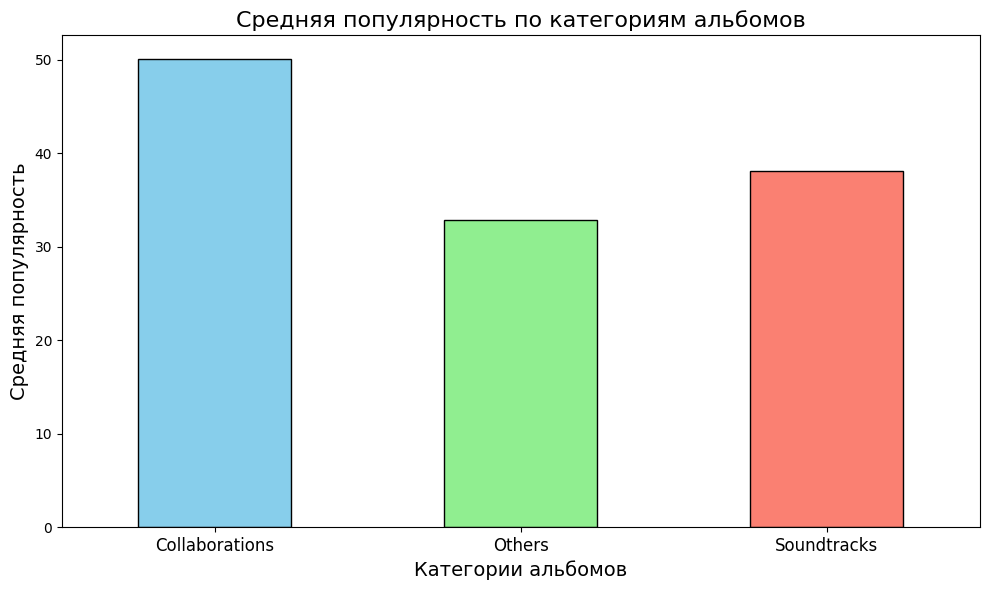

In [182]:
def categorize_album(name):
    name_lower = name.lower()  # Приводим к нижнему регистру для удобства поиска
    if 'feat' in name_lower or 'with' in name_lower:
        return 'Collaborations'
    elif 'from the' in name_lower:
        return 'Soundtracks'
    else:
        return 'Others'

t_df['album_category'] = t_df['album_name'].apply(categorize_album)

category_popularity = t_df.groupby('album_category')['popularity'].mean()

plt.figure(figsize=(10, 6))
category_popularity.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title('Средняя популярность по категориям альбомов', fontsize=16)
plt.xlabel('Категории альбомов', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

Можно сделать вывод, что альбомы-коллаборации и саундтреки из фильмов гораздо популярнее остальных треков. Есть идея сделать с альбомами так же как я сделал с исполнителями, добавить столбец Is_Superalbum и если альбом в топ-50 по популярности, то ставить true.

# Feature enginering


Заменим столбец artists на их количество и булевый is_Superstar, который принимает значение True, если хоть один из исполнителей в топ 100 по популярности.

In [183]:
t_df['artist_count'] = t_df['artists'].apply(lambda x: len(x.split(';')))

top_artists = (
    t_df.groupby('artists')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(100)
    .index
)
def is_superstar(artists):
    artist_list = artists.split(';')  
    return any(artist.strip() in top_artists for artist in artist_list)

t_df['is_Superstar'] = t_df['artists'].apply(is_superstar)
t_df.drop('artists', axis = 1, inplace = True)

Удалим ещё ненужные признаки

In [184]:
t_df['danceability'].isna().sum()

0

In [185]:
t_df['title_length'] = t_df['track_name'].str.len()
t_df.drop(['track_name'], axis = 1, inplace = True)

Далее преобразуем остальные числовые признаки. 

In [187]:
t_df['combined_energy'] = (t_df['energy'] + t_df['loudness']) / 2 #создадим новый столбец, в который пойдет медиана энергии и громкости
t_df.drop(['energy', 'loudness'], axis = 1, inplace = True)

KeyError: 'energy'

Заменим некоторые признаки категориями.

In [189]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0] 
labels = ['Очень низкая', 'Низкая', 'Средняя', 'Высокая', 'Очень высокая']  

t_df['danceability_category'] = pd.cut(t_df['danceability'], bins=bins, labels=labels, include_lowest=True)
t_df.drop(['danceability'], axis = 1, inplace = True)


KeyError: 'danceability'

По такому же принципу заменил instrumentalness

In [190]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0] 
labels = ['Очень низкая', 'Низкая', 'Средняя', 'Высокая', 'Очень высокая']  

t_df['instrumentalness_category'] = pd.cut(t_df['instrumentalness'], bins=bins, labels=labels, include_lowest=True)
t_df.drop(['instrumentalness'], axis = 1, inplace = True)

Далее преобразуем популярность альбома в новый признак и удаляем старый столбец.

In [191]:
top_50_albums = t_df.groupby('album_name')['popularity'].mean().nlargest(50).index

t_df['is_superalbum'] = t_df['album_name'].isin(top_50_albums)

t_df.drop(['album_name'], axis = 1, inplace = True)
t_df['is_superalbum'].sum()

152

In [192]:
t_df

popularity  explicit  key  mode  speechiness  acousticness  liveness  \
0               73     False    1     0       0.1430        0.0322    0.3580   
1               55     False    1     1       0.0763        0.9240    0.1010   
2               57     False    0     1       0.0557        0.2100    0.1170   
3               71     False    0     1       0.0363        0.9050    0.1320   
4               82     False    2     1       0.0526        0.4690    0.0829   
...            ...       ...  ...   ...          ...           ...       ...   
113995          21     False    5     1       0.0422        0.6400    0.0863   
113996          22     False    0     0       0.0401        0.9940    0.1050   
113997          22     False    0     0       0.0420        0.8670    0.0839   
113998          41     False    7     1       0.0297        0.3810    0.2700   
113999          22     False    1     0       0.0725        0.6810    0.0893   

        valence    tempo  time_signature  track_genre  duration_minutes  \
0        0.7150   87.917               4     acoustic          3.844433   
1        0.2670   77.489               4     acoustic          2.493500   
2        0.1200   76.332               4     acoustic          3.513767   
3        0.1430  181.740               3     acoustic          3.365550   
4        0.1670  119.949               4     acoustic          3.314217   
...         ...      ...             ...          ...               ...   
113995   0.0339  125.995               5  world-music          6.416650   
113996   0.0350   85.239               4  world-music          6.416667   
113997   0.7430  132.378               4  world-music          4.524433   
113998   0.4130  135.960               4  world-music          4.731550   
113999   0.7080   79.198               4  world-music          4.030433   

       duration_category  artist_count album_category  is_Superstar  \
0                 Medium             1         Others         False   
1                 Medium             1         Others         False   
2                 Medium             2         Others         False   
3                 Medium             1         Others         False   
4                 Medium             1         Others         False   
...                  ...           ...            ...           ...   
113995              Long             1         Others         False   
113996              Long             1         Others         False   
113997              Long             1         Others         False   
113998              Long             1         Others         False   
113999              Long             1         Others         False   

        title_length  combined_energy danceability_category  \
0                  6          -3.1425               Высокая   
1                 16          -8.5345               Средняя   
2                 14          -4.6875               Средняя   
3                 26          -9.2277                Низкая   
4                  7          -4.6190               Высокая   
...              ...              ...                   ...   
113995            19          -8.0790          Очень низкая   
113996            16          -9.1005          Очень низкая   
113997            14          -5.2830               Высокая   
113998             7          -5.1915               Средняя   
113999             9          -4.8585               Средняя   

       instrumentalness_category  is_superalbum  
0                   Очень низкая          False  
1                   Очень низкая          False  
2                   Очень низкая          False  
3                   Очень низкая          False  
4                   Очень низкая          False  
...                          ...            ...  
113995             Очень высокая          False  
113996             Очень высокая          False  
113997              Очень низкая          False  
113998              Очень низкая    

Наверное на этом с преобразованиями закончу, не буду менять остальные признаки на категориальные, боюсь убить точность модели в ноль. Теперь нормализуем данные через MinMaxScaler, чтобы у нас данные все были в пределах от 0 до 1.

In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
t_df[['energy', 'loudness', 'popularity', 'tempo']] = scaler.fit_transform(t_df[['energy', 'loudness', 'popularity', 'tempo']])


KeyError: "['energy', 'loudness'] not in index"

Далее кодируем категориальные признаки через labelEncoder

In [194]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = ['track_genre', 'duration_category', 'album_category', 'danceability_category', 'instrumentalness_category']
for label in labels:
    t_df[label] = le.fit_transform(t_df[label])


Теперь переходим к новой матрице корреляции

<Axes: >

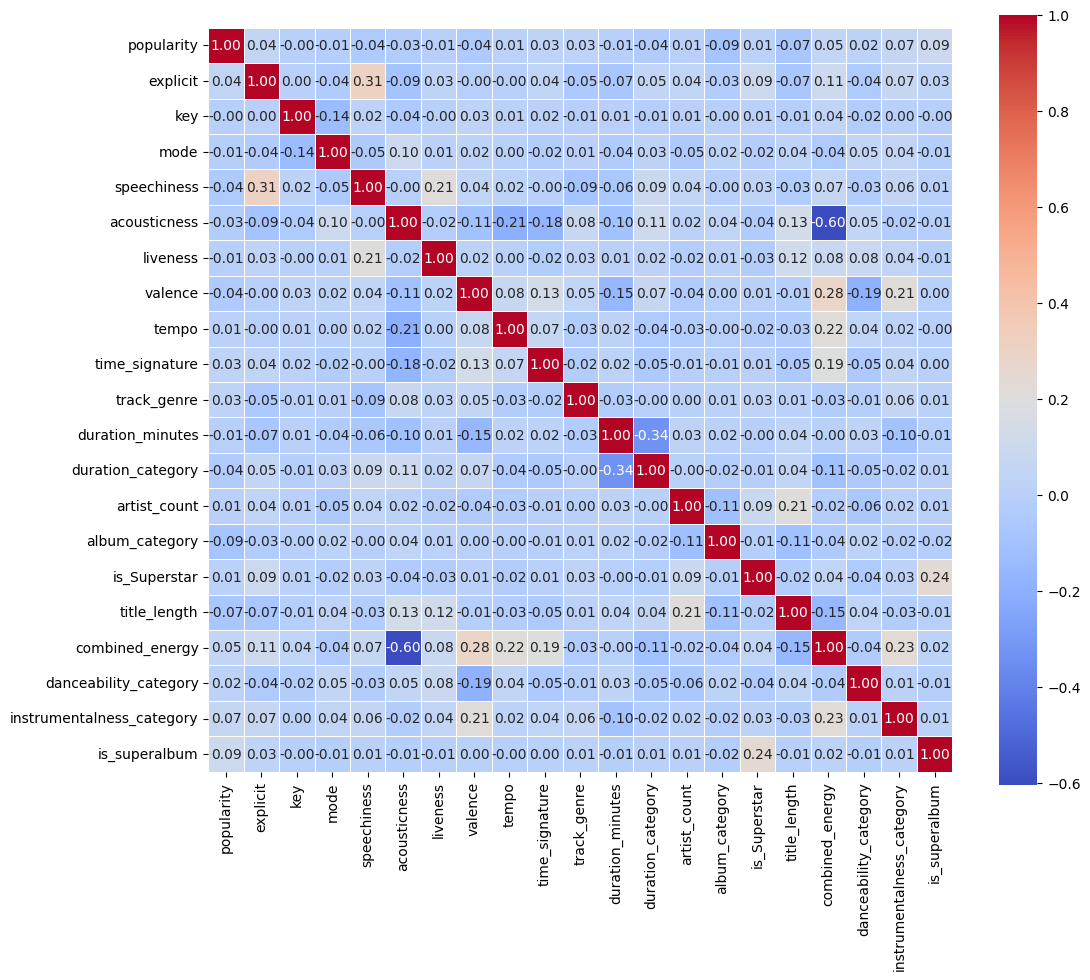

In [195]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    t_df.corr(),       
    annot=True,         
    fmt='.2f',          
    cmap='coolwarm',    
    linewidths=0.5,     
    square=True         
)

Вывод по матрице:
наибольших корреляций с popularity удалось достичь с помощью выделения признаков album_category, title_length, is_superalbum и instrumentalness_category. Да и в целом значения корреляции в строке popularity стали повыше. 

# Эксперименты с моделями


**Нейросеть**

In [201]:
t_df

popularity  explicit  key  mode  speechiness  acousticness  liveness  \
0               73     False    1     0       0.1430        0.0322    0.3580   
1               55     False    1     1       0.0763        0.9240    0.1010   
2               57     False    0     1       0.0557        0.2100    0.1170   
3               71     False    0     1       0.0363        0.9050    0.1320   
4               82     False    2     1       0.0526        0.4690    0.0829   
...            ...       ...  ...   ...          ...           ...       ...   
113995          21     False    5     1       0.0422        0.6400    0.0863   
113996          22     False    0     0       0.0401        0.9940    0.1050   
113997          22     False    0     0       0.0420        0.8670    0.0839   
113998          41     False    7     1       0.0297        0.3810    0.2700   
113999          22     False    1     0       0.0725        0.6810    0.0893   

        valence    tempo  time_signature  track_genre  duration_minutes  \
0        0.7150   87.917               4            0          3.844433   
1        0.2670   77.489               4            0          2.493500   
2        0.1200   76.332               4            0          3.513767   
3        0.1430  181.740               3            0          3.365550   
4        0.1670  119.949               4            0          3.314217   
...         ...      ...             ...          ...               ...   
113995   0.0339  125.995               5          113          6.416650   
113996   0.0350   85.239               4          113          6.416667   
113997   0.7430  132.378               4          113          4.524433   
113998   0.4130  135.960               4          113          4.731550   
113999   0.7080   79.198               4          113          4.030433   

        duration_category  artist_count  album_category  is_Superstar  \
0                       2             1               1         False   
1                       2             1               1         False   
2                       2             2               1         False   
3                       2             1               1         False   
4                       2             1               1         False   
...                   ...           ...             ...           ...   
113995                  1             1               1         False   
113996                  1             1               1         False   
113997                  1             1               1         False   
113998                  1             1               1         False   
113999                  1             1               1         False   

        title_length  combined_energy  danceability_category  \
0                  6          -3.1425                      0   
1                 16          -8.5345                      4   
2                 14          -4.6875                      4   
3                 26          -9.2277                      1   
4                  7          -4.6190                      0   
...              ...              ...                    ...   
113995            19          -8.0790                      3   
113996            16          -9.1005                      3   
113997            14          -5.2830                      0   
113998             7          -5.1915                      4   
113999             9          -4.8585                      4   

        instrumentalness_category  is_superalbum  
0                               3          False  
1                               3          False  
2                               3          False  
3                               3          False  
4                               3          False  
...                           ...            ...  
113995                          2          False  
113996                          2          False  
113997                          3        

Самая базовая модель, сейчас буду с ней экспериментировать

In [204]:
import tensorflow as tf
from tensorflow import keras

X = t_df.drop(columns=['popularity'])  
y = t_df['popularity']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 619.7524 - val_loss: 470.5578
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 463.5717 - val_loss: 463.1324
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 456.0627 - val_loss: 459.0045
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 449.1151 - val_loss: 452.7212
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 443.4651 - val_loss: 448.5428
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 436.0236 - val_loss: 443.0730
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 430.6640 - val_loss: 444.3243
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 427.9205 - val_loss: 440.8042
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 425.6503 - val_loss: 438.8245
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 426.0894 - val_loss: 436.2881
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 433.4508
Test Loss: 429.2662353515625


In [197]:
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 420.6841 - val_loss: 435.1087
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 416.2291 - val_loss: 436.3563
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 418.4992 - val_loss: 432.2709
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 414.0733 - val_loss: 432.1273
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 413.5408 - val_loss: 429.7838
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 411.6655 - val_loss: 432.1374
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 409.4807 - val_loss: 432.6268
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 407.1803 - val_loss: 429.0599
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 408.1225 - val_loss: 430.4458
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 406.5410 - val_loss: 429.4603


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 626.1097 - val_loss: 469.9914
Epoch 2/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 462.9082 - val_loss: 462.6843
Epoch 3/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 453.4553 - val_loss: 455.5888
Epoch 4/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 444.2318 - val_loss: 454.6558
Epoch 5/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 442.4875 - val_loss: 449.7651
Epoch 6/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 438.5572 - val_loss: 444.9972
Epoch 7/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 430.3539 - val_loss: 445.6506
Epoch 8/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 430.9357 - val_loss: 440.9456
Epoch 9/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 429.7432 - val_loss: 440.5922
Epoch 10/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 422.2613 - val_loss: 437.7377
Epoch 11/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 422.7177 - val_loss: 437.62

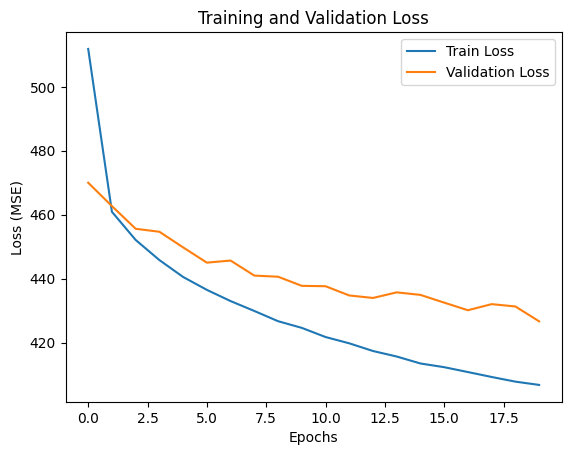

In [200]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras


X = t_df.drop(columns=['popularity'])  
y = t_df['popularity']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  # Используем MSE как функцию потерь

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 629.4096 - val_loss: 472.7828
Epoch 2/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 460.2394 - val_loss: 455.2667
Epoch 3/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 448.4106 - val_loss: 448.1049
Epoch 4/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 434.3758 - val_loss: 451.3825
Epoch 5/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 429.8123 - val_loss: 436.0482
Epoch 6/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 421.9875 - val_loss: 437.8779
Epoch 7/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 421.0682 - val_loss: 430.6174
Epoch 8/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 414.4402 - val_loss: 428.3246
Epoch 9/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 415.2159 - val_loss: 429.3982
Epoch 10/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 412.2129 - val_loss: 428.6093
Epoch 11/20
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 407.9810 - val_loss: 425.25

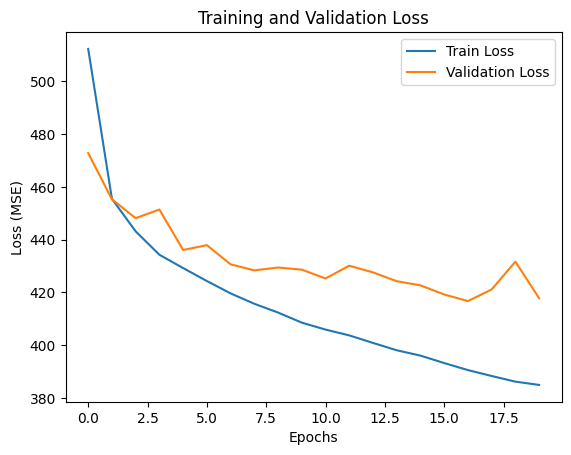

In [202]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'), #экспериментирую с количеством нейронов и слоёв
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Mae улучшился, график тоже стал получше. Работаем дальше

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 650.3452 - val_loss: 470.2228
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 457.7072 - val_loss: 455.0713
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 442.3072 - val_loss: 451.1927
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 437.1661 - val_loss: 445.4792
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 432.8748 - val_loss: 438.9122
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 423.1215 - val_loss: 433.8969
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 418.1007 - val_loss: 435.4513
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 415.4232 - val_loss: 429.8793
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 408.5720 - val_loss: 430.6355
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 409.1714 - val_loss: 427.2391
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 402.8386 - val_loss: 425.5255
Epoch 12/30
570/570

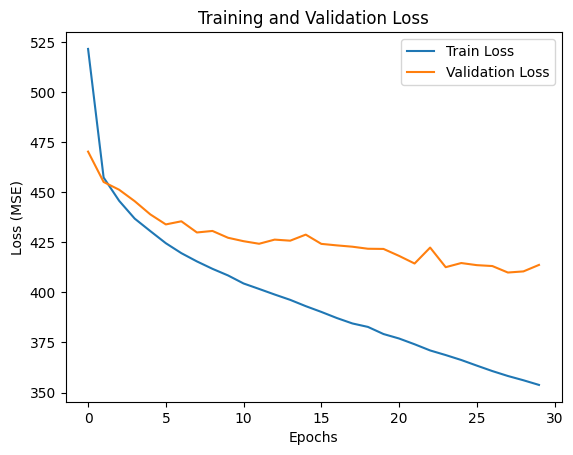

In [207]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'), #экспериментирую с количеством нейронов и слоёв
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)
#пробую batch_size увеличить, чтобы ещё ускорить обучение и поставил 30 эпох
# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Результат пока самый лучший.

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 920.8500 - val_loss: 486.1807
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 475.6512 - val_loss: 474.4663
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 467.6773 - val_loss: 470.7037
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 460.9116 - val_loss: 467.0332
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 460.7289 - val_loss: 463.9514
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 457.8914 - val_loss: 461.2296
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 454.9455 - val_loss: 456.7224
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 447.7142 - val_loss: 453.8056
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 443.6958 - val_loss: 451.4128
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 440.1088 - val_loss: 449.9521
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 438.4383 - val_loss: 447.6407
Epoch 12/30
570/570

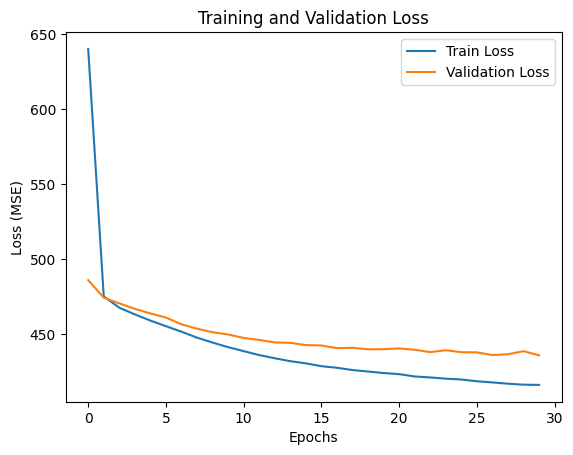

In [208]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'), #пробую уменьшить число слоёв и нейронов
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)
#пробую batch_size увеличить, чтобы ещё ускорить обучение и поставил 30 эпох
# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Уменьшать число слоёв или нейронов было плохой идеей.  График стал получше, а вот loss и Mae, rmse выросли


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 744.9271 - val_loss: 475.9360
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 469.2576 - val_loss: 463.9798
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 457.0030 - val_loss: 456.1892
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 447.3358 - val_loss: 450.8391
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 443.7318 - val_loss: 447.4071
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 438.1718 - val_loss: 444.9489
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 427.3933 - val_loss: 442.0622
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 425.0519 - val_loss: 440.8361
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 420.7285 - val_loss: 436.4908
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 418.0790 - val_loss: 434.5113
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 417.5707 - val_loss: 437.2065
Epoch 12/30
570/570

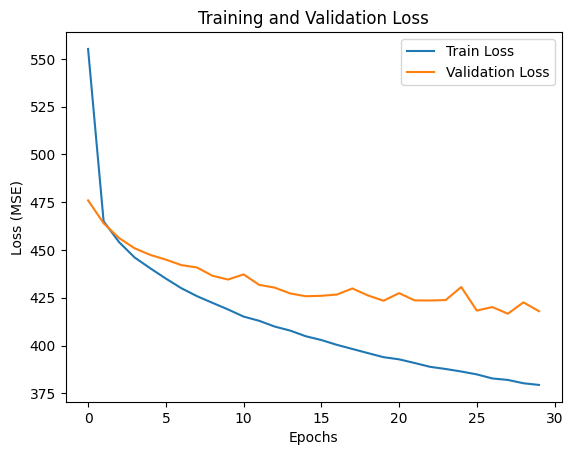

In [209]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='relu'), #экспериментирую с количеством нейронов и слоёв
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)
#пробую batch_size увеличить, чтобы ещё ускорить обучение и поставил 30 эпох
# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

а сейчас попробую наоборот много слоёв с небольшим числом нейронов

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 823.2864 - val_loss: 479.3937
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 473.7608 - val_loss: 470.0756
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 461.1585 - val_loss: 462.5578
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 452.2310 - val_loss: 457.2427
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 445.3048 - val_loss: 458.4489
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 445.5289 - val_loss: 452.7240
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 439.2128 - val_loss: 451.1596
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 440.5122 - val_loss: 449.2667
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 438.7676 - val_loss: 448.6099
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 431.9732 - val_loss: 446.3164
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 434.0278 - val_loss: 443.1932
Epoch 12/30
570/570

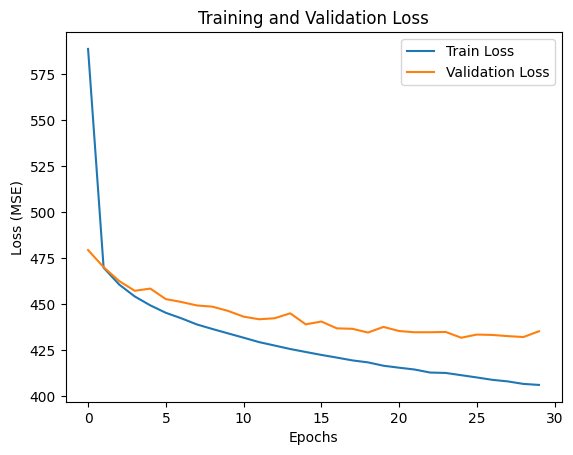

In [210]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)
#пробую batch_size увеличить, чтобы ещё ускорить обучение и поставил 30 эпох
# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Нет, нейронов явно не хватило

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 722.8598 - val_loss: 472.2191
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 462.8415 - val_loss: 459.2160
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 450.6559 - val_loss: 452.2515
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 443.5922 - val_loss: 449.1408
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 436.2368 - val_loss: 442.7836
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 428.7043 - val_loss: 440.1755
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 422.9426 - val_loss: 444.3361
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 419.3688 - val_loss: 434.9217
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 412.6973 - val_loss: 436.9819
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 413.7722 - val_loss: 435.2825
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 408.7833 - val_loss: 431.8506
Epoch 12/30
570/570

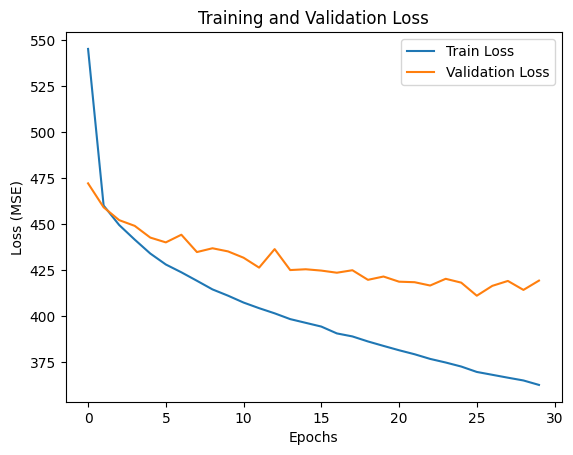

In [211]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'), #пробую добавить нейронов
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)
#пробую batch_size увеличить, чтобы ещё ускорить обучение и поставил 30 эпох
# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Mae стал меньше. Возможно стоит ещё добавить слой и нейронов.

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 685.9471 - val_loss: 469.5313
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 457.6054 - val_loss: 452.3802
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 442.5526 - val_loss: 447.8170
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 434.1128 - val_loss: 444.3834
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 429.7835 - val_loss: 435.0112
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 424.9844 - val_loss: 434.5553
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 413.5497 - val_loss: 431.3586
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 406.7870 - val_loss: 432.1845
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 402.7745 - val_loss: 426.6912
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 398.1617 - val_loss: 421.5665
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 396.8531 - val_loss: 419.7105
Epoch 12/30
570/570

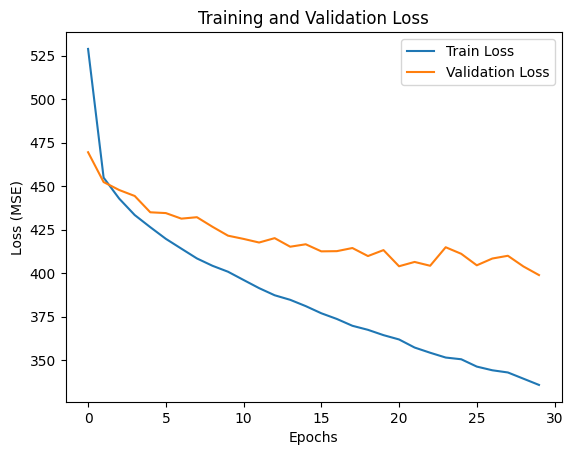

In [212]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)
#пробую batch_size увеличить, чтобы ещё ускорить обучение и поставил 30 эпох
# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Значения стали ещё лучше. Но модель переобучается, стоит попробовать добавить дропаутов и поменять метод активации.

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1064.2045 - val_loss: 604.0146
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 558.0364 - val_loss: 506.3417
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 503.7258 - val_loss: 500.3742
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 494.4265 - val_loss: 500.2291
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 498.8590 - val_loss: 500.2253
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 499.1062 - val_loss: 500.2791
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 498.5008 - val_loss: 500.2911
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 495.5339 - val_loss: 500.2203
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 498.7650 - val_loss: 500.3055
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 496.7859 - val_loss: 500.2206
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 500.1446 - val_loss: 500.2267
Epoch 12/30
570/57

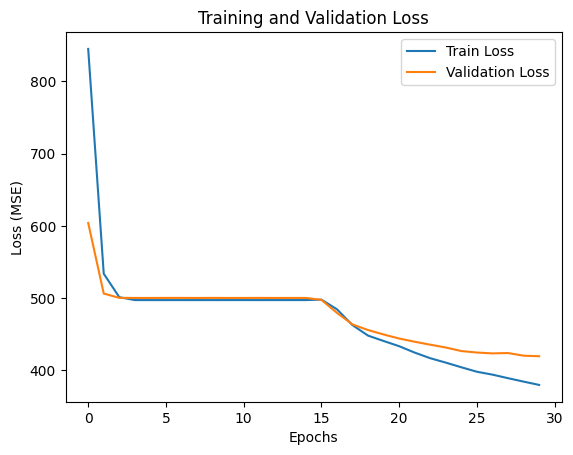

In [213]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(1)  
]) #дропауты пока добавлять не стал

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)
#пробую batch_size увеличить, чтобы ещё ускорить обучение и поставил 30 эпох
# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Это было что то странное. Протестирую ещё elu вариант активации.

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 654.3066 - val_loss: 464.2855
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 460.0625 - val_loss: 455.4457
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 447.6195 - val_loss: 449.7282
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 440.8214 - val_loss: 452.3253
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 438.1749 - val_loss: 444.0833
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 432.8812 - val_loss: 438.0954
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 424.2005 - val_loss: 437.2706
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 419.2430 - val_loss: 433.8675
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 412.5602 - val_loss: 430.6540
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 407.7910 - val_loss: 430.0801
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 403.9797 - val_loss: 424.6614
Epoch 12/30
570/570

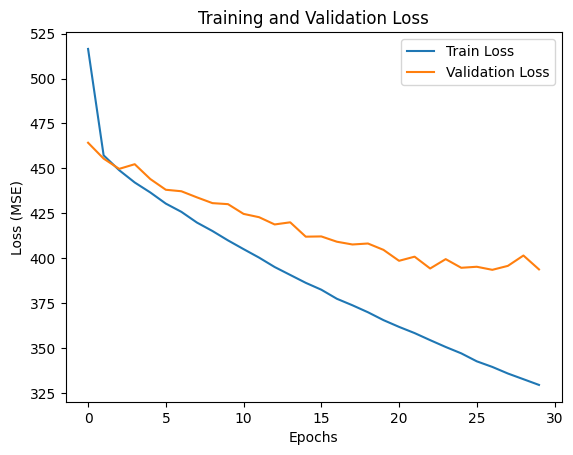

In [214]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='elu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dense(32, activation='elu'),
    keras.layers.Dense(1)  
]) #дропауты пока добавлять не стал

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)
#пробую batch_size увеличить, чтобы ещё ускорить обучение и поставил 30 эпох
# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 723.5504 - val_loss: 478.8346
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 508.0656 - val_loss: 470.9017
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 498.8727 - val_loss: 469.0678
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 492.2070 - val_loss: 464.8184
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 482.9277 - val_loss: 464.0134
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 481.6205 - val_loss: 465.3336
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 484.4844 - val_loss: 456.9166
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 478.7653 - val_loss: 455.9341
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 476.4437 - val_loss: 454.0425
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 474.1682 - val_loss: 453.5029
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 470.8204 - val_loss: 451.3323
Epoch 12/30
570/570

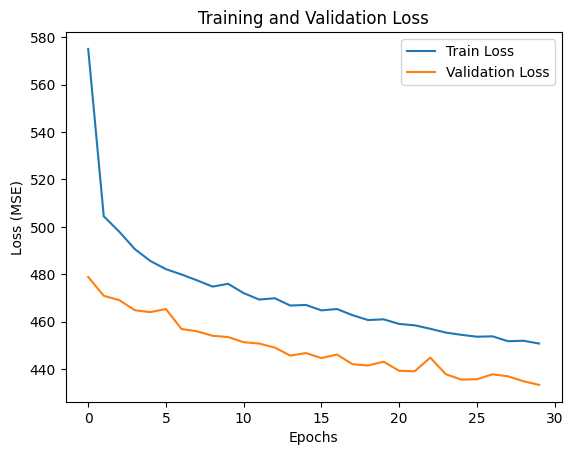

In [215]:
from tensorflow.keras.layers import Dropout

# Создание модели с Dropout
model = keras.Sequential([
    keras.layers.Dense(128, activation='elu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout с вероятностью 30%
    keras.layers.Dense(128, activation='elu'),
    Dropout(0.3),
    keras.layers.Dense(64, activation='elu'),
    Dropout(0.3),
    keras.layers.Dense(64, activation='elu'),
    Dropout(0.3),
    keras.layers.Dense(64, activation='elu'),
    Dropout(0.3),
    keras.layers.Dense(32, activation='elu'),
    Dropout(0.3),
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Дропаут слишком велик


In [216]:
from tensorflow.keras.layers import Dropout

# Создание модели с Dropout
model = keras.Sequential([
    keras.layers.Dense(128, activation='elu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),  # Dropout с вероятностью 10%
    keras.layers.Dense(128, activation='elu'),
    Dropout(0.1),
    keras.layers.Dense(64, activation='elu'),
    Dropout(0.1),
    keras.layers.Dense(64, activation='elu'),
    Dropout(0.1),
    keras.layers.Dense(64, activation='elu'),
    Dropout(0.1),
    keras.layers.Dense(32, activation='elu'),
    Dropout(0.1),
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 682.3987 - val_loss: 468.9619
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 474.1874 - val_loss: 458.9557
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 464.3653 - val_loss: 455.5982
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 461.5129 - val_loss: 451.7523
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 453.7109 - val_loss: 448.9946
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 450.9956 - val_loss: 443.9673
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 442.7117 - val_loss: 444.8096
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 444.7936 - val_loss: 438.5337
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 432.9468 - val_loss: 437.6458
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 435.7539 - val_loss: 432.6360
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 430.5755 - val_loss: 430.1198
Epoch 12/30
570/570

In [217]:
from tensorflow.keras.layers import Dropout

# Создание модели с Dropout
model = keras.Sequential([
    keras.layers.Dense(128, activation='elu', input_shape=(X_train.shape[1],)),
    Dropout(0.05),  # ещё пробую уменьшить дропаут
    keras.layers.Dense(128, activation='elu'),
    Dropout(0.05),
    keras.layers.Dense(64, activation='elu'),
    Dropout(0.05),
    keras.layers.Dense(64, activation='elu'),
    Dropout(0.05),
    keras.layers.Dense(64, activation='elu'),
    Dropout(0.05),
    keras.layers.Dense(32, activation='elu'),
    Dropout(0.05),
    keras.layers.Dense(1)  
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')  

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

# Оценка модели
y_pred = model.predict(X_test).flatten()

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Вывод графиков для обучения модели
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 648.1163 - val_loss: 464.2058
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 464.9651 - val_loss: 455.4115
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 455.2042 - val_loss: 454.1564
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 451.6859 - val_loss: 448.2245
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 444.7937 - val_loss: 442.1886
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 440.4141 - val_loss: 438.0150
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 436.7748 - val_loss: 435.5285
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 429.4290 - val_loss: 434.3563
Epoch 9/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 423.8383 - val_loss: 427.8020
Epoch 10/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 420.2236 - val_loss: 426.2867
Epoch 11/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 414.9363 - val_loss: 425.2433
Epoch 12/30
570/570

Остановлюсь на этой модели, так как результаты одни из самых лучших и график не идеален, но лучший из всех. Сделаю на её основе feature importance. Но так как эта модель - нейронная сеть, то будет Permutation importance. 

In [220]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

model = LinearRegression()

param_grid = {'alpha': [0.01, 0.1, 1.0, 10]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_



y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")




MAE: 18.31777592897321
RMSE: 21.862918872584235
R^2: 0.036489893113890726


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

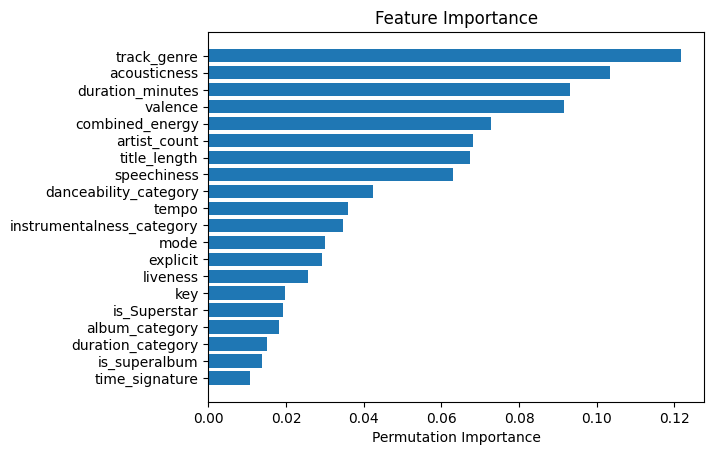

In [218]:
from sklearn.inspection import permutation_importance

# Прогнозирование на тестовом наборе
y_pred = model.predict(X_test).flatten()

# Вычисление важности признаков
perm_importance = permutation_importance(
    model, X_test, y_test, scoring='r2', n_repeats=10, random_state=42
)

# Вывод важности признаков
for i, feature in enumerate(X.columns):
    print(f"{feature}: {perm_importance.importances_mean[i]:.4f}")

# Визуализация
import matplotlib.pyplot as plt

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()

Мы видим, что больше всего влияет track_genre и acousticness. Из созданных мной признаков наиболее влияют combined_energy, artist_count, title_length, да и остальные в принципе тоже не так плохи. Наименее полезными оказались is_superalbum, duration_category.

**Линейная модель**

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 18.31777592897321
RMSE: 21.862918872584235
R^2: 0.036489893113890726


Пока результаты похуже чем у нейросети, попробую поиграться с моделью насколько это возможно.

In [223]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Подбор значения регуляризации
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],  # Разные методы оптимизации
    'fit_intercept': [True, False]  # Учитывать ли свободный член
}

# Использование GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Лучшие параметры и модель
print(f"Лучшие параметры: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Оценка лучшей модели
y_pred = best_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")




Fitting 5 folds for each of 60 candidates, totalling 300 fits
Лучшие параметры: {'alpha': 100, 'fit_intercept': True, 'solver': 'auto'}
MAE: 18.318141052649736
RMSE: 21.862938947312884
R^2: 0.036488123705794795


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py", line 129, in _solve_sparse_cg
    coefs[i], info = sp_linalg.cg(
TypeError: cg() got an unexpected keyword argument 'tol'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File 

это не работает. Я не совсем понимаю, что вообще ещё можно в модели менять.

**Модификация градиентного бустинга**

решил выбрать xgboost, дабы не засорять всеми моделями ноутбук, остановлюсь на нём и попробую улучшить его результат.

In [225]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror', 
    'eval_metric': 'rmse',  
    'eta': 0.1,  
    'max_depth': 6,  
    'subsample': 0.8,  
    'colsample_bytree': 0.8,  
    'seed': 42
}

num_rounds = 100
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,  
    verbose_eval=10
)

y_pred = model.predict(dtest)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")



[0]	train-rmse:22.15987	test-rmse:22.13250
[10]	train-rmse:20.97310	test-rmse:20.98114
[20]	train-rmse:20.19883	test-rmse:20.23395
[30]	train-rmse:19.70900	test-rmse:19.78120
[40]	train-rmse:19.29206	test-rmse:19.40700
[50]	train-rmse:18.85185	test-rmse:19.02986
[60]	train-rmse:18.62352	test-rmse:18.85156
[70]	train-rmse:18.38239	test-rmse:18.66388
[80]	train-rmse:18.18211	test-rmse:18.50763
[90]	train-rmse:17.98133	test-rmse:18.35902
[99]	train-rmse:17.83886	test-rmse:18.25920
MAE: 13.98305250626956
RMSE: 18.25919861734107
R^2: 0.32794717089881653


Результат уже на пару пунктов лучше чем у нейросети. Попробую дальше поиграться с моделью. А конкретно  - увеличить eta(learning rate).

In [307]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Регрессия с MSE
    'eval_metric': 'rmse',  # Оценка RMSE во время обучения
    'eta': 0.5,  # Темп обучения (learning rate)
    'max_depth': 8,  # Глубина дерева
    'subsample': 0.8,  # Доля выборки для обучения деревьев
    'colsample_bytree': 0.8,  # Доля фичей для обучения каждого дерева
    'seed': 42  
}

num_rounds = 100
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,  # Остановка при отсутствии улучшений
    verbose_eval=10
)

y_pred = model.predict(dtest)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Регрессия с MSE
    'eval_metric': 'rmse',  # Оценка RMSE во время обучения
    'eta': 0.1,  # Темп обучения (learning rate)
    'max_depth': 16,  # Глубина дерева
    'subsample': 0.95,  # Доля выборки для обучения деревьев
    'colsample_bytree': 0.45,  # Доля фичей для обучения каждого дерева
    'seed': 74
}

num_rounds = 120
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,  # Остановка при отсутствии улучшений
    verbose_eval=12
)

y_pred = model.predict(dtest)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")



[0]	train-rmse:21.40902	test-rmse:21.45278
[10]	train-rmse:17.59531	test-rmse:18.38607
[20]	train-rmse:16.27889	test-rmse:17.69322
[30]	train-rmse:15.22076	test-rmse:17.27550
[40]	train-rmse:14.29084	test-rmse:16.94877
[50]	train-rmse:13.57593	test-rmse:16.76445
[60]	train-rmse:12.92406	test-rmse:16.57562
[70]	train-rmse:12.35856	test-rmse:16.47927
[80]	train-rmse:11.79134	test-rmse:16.39528
[90]	train-rmse:11.30469	test-rmse:16.29107
[99]	train-rmse:10.95528	test-rmse:16.26211
MAE: 11.964024477497953
RMSE: 16.2621110718726
R^2: 0.4669182261569004
[0]	train-rmse:21.45794	test-rmse:21.56337
[12]	train-rmse:15.20691	test-rmse:17.48299
[24]	train-rmse:12.11426	test-rmse:15.88640
[36]	train-rmse:10.23728	test-rmse:15.12720
[48]	train-rmse:8.86082	test-rmse:14.61715
[60]	train-rmse:7.99490	test-rmse:14.33931
[72]	train-rmse:7.39717	test-rmse:14.14656
[84]	train-rmse:6.87355	test-rmse:14.04925
[96]	train-rmse:6.29284	test-rmse:13.93981
[108]	train-rmse:5.75837	test-rmse:13.81626
[119]	train-

Результат снова стал лучше. Попробую ещё "ускорить" модель 

In [229]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Регрессия с MSE
    'eval_metric': 'rmse',  # Оценка RMSE во время обучения
    'eta': 0.8,  # Темп обучения (learning rate)
    'max_depth': 8,  # Глубина дерева
    'subsample': 0.8,  # Доля выборки для обучения деревьев
    'colsample_bytree': 0.8,  # Доля фичей для обучения каждого дерева
    'seed': 42  
}

num_rounds = 100
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,  # Остановка при отсутствии улучшений
    verbose_eval=10
)

y_pred = model.predict(dtest)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")



[0]	train-rmse:21.15013	test-rmse:21.22912
[10]	train-rmse:17.02502	test-rmse:18.53872
[20]	train-rmse:15.52438	test-rmse:18.07231
[30]	train-rmse:14.47099	test-rmse:17.95236
[40]	train-rmse:13.67111	test-rmse:17.94050
[50]	train-rmse:12.90468	test-rmse:17.92524
[60]	train-rmse:12.31360	test-rmse:17.88126
[70]	train-rmse:11.77212	test-rmse:17.89536
[75]	train-rmse:11.51914	test-rmse:17.89797
MAE: 13.307903433001126
RMSE: 17.89796948381105
R^2: 0.35427512825728535


Нет, похоже значение 0.5 было самым предельным, если ставить больше, то результат уже падает.

In [235]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Регрессия с MSE
    'eval_metric': 'rmse',  # Оценка RMSE во время обучения
    'eta': 0.3,  # Темп обучения (learning rate)
    'max_depth': 8,  # Глубина дерева
    'subsample': 0.8,  # Доля выборки для обучения деревьев
    'colsample_bytree': 0.8,  # Доля фичей для обучения каждого дерева
    'seed': 42  
}

num_rounds = 100
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,  # Остановка при отсутствии улучшений
    verbose_eval=10
)

y_pred = model.predict(dtest)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")



[0]	train-rmse:21.70196	test-rmse:21.71630
[10]	train-rmse:18.55601	test-rmse:18.93965
[20]	train-rmse:17.12699	test-rmse:17.93469
[30]	train-rmse:16.35497	test-rmse:17.53179
[40]	train-rmse:15.49972	test-rmse:17.09288
[50]	train-rmse:14.86978	test-rmse:16.82045
[60]	train-rmse:14.31446	test-rmse:16.54928
[70]	train-rmse:13.83407	test-rmse:16.38287
[80]	train-rmse:13.40696	test-rmse:16.22703
[90]	train-rmse:12.88816	test-rmse:16.03963
[99]	train-rmse:12.54650	test-rmse:15.94299
MAE: 11.68633951016277
RMSE: 15.942992413812712
R^2: 0.4876347500022721


Идеальный темп - 0.3. Попробую поменять глубину дерева.


In [238]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Регрессия с MSE
    'eval_metric': 'rmse',  # Оценка RMSE во время обучения
    'eta': 0.5,  # Темп обучения (learning rate)
    'max_depth': 16,  # Глубина дерева
    'subsample': 0.8,  # Доля выборки для обучения деревьев
    'colsample_bytree': 0.8,  # Доля фичей для обучения каждого дерева
    'seed': 42  
}

num_rounds = 100
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,  # Остановка при отсутствии улучшений
    verbose_eval=10
)

y_pred = model.predict(dtest)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")



[0]	train-rmse:18.64111	test-rmse:19.67536
[10]	train-rmse:8.91820	test-rmse:16.30829
[20]	train-rmse:6.11174	test-rmse:16.14020
[30]	train-rmse:4.63653	test-rmse:16.04982
[35]	train-rmse:4.37125	test-rmse:16.09253
MAE: 11.079183058738382
RMSE: 16.092528199332012
R^2: 0.47797831301785565


серьезно увеличил глубину дерева, но результат стал лучше. Попробую ещё.

In [241]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Регрессия с MSE
    'eval_metric': 'rmse',  # Оценка RMSE во время обучения
    'eta': 0.5,  # Темп обучения (learning rate)
    'max_depth': 16,  # Глубина дерева
    'subsample': 0.8,  # Доля выборки для обучения деревьев
    'colsample_bytree': 0.8,  # Доля фичей для обучения каждого дерева
    'seed': 42  
}

num_rounds = 100
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,  # Остановка при отсутствии улучшений
    verbose_eval=10
)

y_pred = model.predict(dtest)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")



[0]	train-rmse:18.64111	test-rmse:19.67536
[10]	train-rmse:8.91820	test-rmse:16.30829
[20]	train-rmse:6.11174	test-rmse:16.14020
[30]	train-rmse:4.63653	test-rmse:16.04982
[35]	train-rmse:4.37125	test-rmse:16.09253
MAE: 11.079183058738382
RMSE: 16.092528199332012
R^2: 0.47797831301785565


если ставить глубину больше 16, то результат становится лучше, но модель слишком долго выдает результат. 

In [308]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Регрессия с MSE
    'eval_metric': 'rmse',  # Оценка RMSE во время обучения
    'eta': 0.1,  # Темп обучения (learning rate)
    'max_depth': 16,  # Глубина дерева
    'subsample': 0.95,  # Доля выборки для обучения деревьев
    'colsample_bytree': 0.45,  # Доля фичей для обучения каждого дерева
    'seed': 74
}

num_rounds = 120
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,  # Остановка при отсутствии улучшений
    verbose_eval=12
)

y_pred = model.predict(dtest)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")



[0]	train-rmse:21.45794	test-rmse:21.56337
[12]	train-rmse:15.20691	test-rmse:17.48299
[24]	train-rmse:12.11426	test-rmse:15.88640
[36]	train-rmse:10.23728	test-rmse:15.12720
[48]	train-rmse:8.86082	test-rmse:14.61715
[60]	train-rmse:7.99490	test-rmse:14.33931
[72]	train-rmse:7.39717	test-rmse:14.14656
[84]	train-rmse:6.87355	test-rmse:14.04925
[96]	train-rmse:6.29284	test-rmse:13.93981
[108]	train-rmse:5.75837	test-rmse:13.81626
[119]	train-rmse:5.31240	test-rmse:13.78870
MAE: 9.484871977827545
RMSE: 13.788696309093046
R^2: 0.6167462603748997


Поменял почти все переменные: число раундов,темп, сид, фичи, выборки, увеличил густоту леса и на данный момент это лучший результат среди всех моделей, в градиентном бустинге остановлюсь на нём.

**Дерево**

Буду использовать Decision Tree Regressor (если честно он просто первым попался)

In [253]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)  
# Обучение модели
tree_model.fit(X_train, y_train)

# Предсказания
y_pred = tree_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 18.05534252768344
RMSE: 21.667633409526335
R^2: 0.05362568113967292


результаты скромные, попробую поиграться с параметрами

In [261]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(
    random_state=42, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=4, 
    ccp_alpha=0.01
)  
# Обучение модели
tree_model.fit(X_train, y_train)

# Предсказания
y_pred = tree_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 16.53920231424395
RMSE: 20.61647685377072
R^2: 0.14322084911351773


Пока стало только хуже.


In [265]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(
    random_state=64, 
    max_depth=5, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    ccp_alpha=0.01
)  
# Обучение модели
tree_model.fit(X_train, y_train)

# Предсказания
y_pred = tree_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 18.056011043337154
RMSE: 21.667774633493746
R^2: 0.05361334465889622


Не особо что то выходит.

In [266]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(
    random_state=42, 
    max_depth=5, 
    min_samples_split=4, 
    min_samples_leaf=12, 
    ccp_alpha=0.05
)  
# Обучение модели
tree_model.fit(X_train, y_train)

# Предсказания
y_pred = tree_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 18.05536526096509
RMSE: 21.66831582617636
R^2: 0.053566068559919855


In [269]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(
    random_state=42, 
    max_depth=15, 
    min_samples_split=6, 
    min_samples_leaf=4, 
    ccp_alpha=0.1
)  
# Обучение модели
tree_model.fit(X_train, y_train)

# Предсказания
y_pred = tree_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 14.970765141854635
RMSE: 19.54586497952113
R^2: 0.2298952946762094


Итак лучший результат, что у меня получилось выбить:  
MAE: 9.484871977827545
RMSE: 13.788696309093046
R^2: 0.61674626037489
Если подводить итог, то лучшая модель - xgboost градиентного бустинга.9709

**Кросс-валидация лучшей модели**

In [310]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Регрессия с MSE
    eta=0.1,  # Темп обучения
    max_depth=16,  # Глубина дерева
    subsample=0.95,  # Доля выборки для обучения деревьев
    colsample_bytree=0.45,  # Доля фичей для обучения каждого дерева
    seed=74
)

# Настроим кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Списки для хранения метрик по каждому фолду
rmse_scores = []
r2_scores = []

# Кросс-валидация
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Обучаем модель на каждом фолде
    model.fit(X_train_fold, y_train_fold)
    
    # Прогнозируем на валидационном наборе
    y_pred_fold = model.predict(X_val_fold)
    
    # Вычисляем метрики для каждого фолда
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    r2_fold = r2_score(y_val_fold, y_pred_fold)
    
    # Сохраняем результаты
    rmse_scores.append(rmse_fold)
    r2_scores.append(r2_fold)

# Средние метрики по всем фолдам
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

print(f"RMSE для каждого фолда: {rmse_scores}")
print(f"Средний RMSE: {mean_rmse}")
print(f"R^2 для каждого фолда: {r2_scores}")
print(f"Средний R^2: {mean_r2}")

RMSE для каждого фолда: [14.528186536447231, 14.443676606944127, 14.371321086802674, 14.368057710676311, 14.538024203054007]
Средний RMSE: 14.449853228784871
R^2 для каждого фолда: [0.5787047683349575, 0.5807998160163796, 0.5850324625546572, 0.5845818080307106, 0.573703194088236]
Средний R^2: 0.5805644098049882


# Вывод


На основе этих данных можно сделать следующие выводы:

RMSE:
Средний RMSE для модели составляет 14.45.
RMSE в пределах фолдов варьируется от 14.37 до 14.54. 
Низкие значения RMSE говорят о том, что модель в целом имеет хорошие результаты.

R²:
Средний R² составляет 0.58, что указывает на то, что модель объясняет около 58% вариации в данных. Это достаточно хороший результат, особенно если данные сложные и имеют множество факторов, которые трудно полностью учесть.
Значения R² варьируются от 0.57 до 0.59 в разных фолдах, что указывает на довольно стабильную производительность модели на разных подмножествах данных.
Общие выводы:
Модель демонстрирует стабильные результаты с небольшими колебаниями между фолдами, как по RMSE, так и по R².
Средний RMSE около 14.45 и средний R² около 0.58 говорят о том, что модель более менее предсказывает таргетную переменную.

Я считаю, что мою модель можно ещё сильно улучшить, если потратить много времени на подбор параметров, а также иметь серьезные ресурсы для её усиления. Но для моего уровня, я считаю, она показывает достойный результат предсказания.
